In [310]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import matplotlib.ticker as tick
import os
import time
import seaborn as sns
colours_sns=sns.color_palette()
colours=np.array([colours_sns[0], colours_sns[1], colours_sns[2], 'crimson','grey', '#9d5783','#4b006e'])

# some layout stuff:
plt.style.use('seaborn-paper')
#sns.set()
plt.rcParams['lines.linewidth'] =1.3
#plt.rcParams['patch.force_edgecolor'] = False
#plt.rcParams['mathtext.fontset'] = 'cm'
#plt.rcParams['mathtext.rm'] = 'serif'

from IPython.display import display, Latex
tex = lambda text : display(Latex(text))

#colours = plt.cm.tab10(np.linspace(0, 1, 10))
#colours2=np.array(['navy', 'royalblue', 'skyblue'])
ls=np.array(['-', '-.', ':'])

# Background

In [470]:
folder = 'data/'
filenames = ['090819_1', '090819_5', '090819_3', '090819_4']
voltages = [0.8, 0.85, 0.9, 0.95]
backgrounds = {}
i=0
for filename in filenames:
    threshold = np.genfromtxt(os.path.join(folder, filename + '_background.txt'), usecols = 0, skip_header = 6, unpack = True)
    rate = np.genfromtxt(os.path.join(folder, filename + '_background.txt'), usecols = (1,2,3,4), skip_header = 6, unpack = True)
    print(filename)
       
    backgrounds[voltages[i]] = rate
    i+=1
    
#backgrounds = np.array(rates)    
    

090819_1
090819_5
090819_3
090819_4


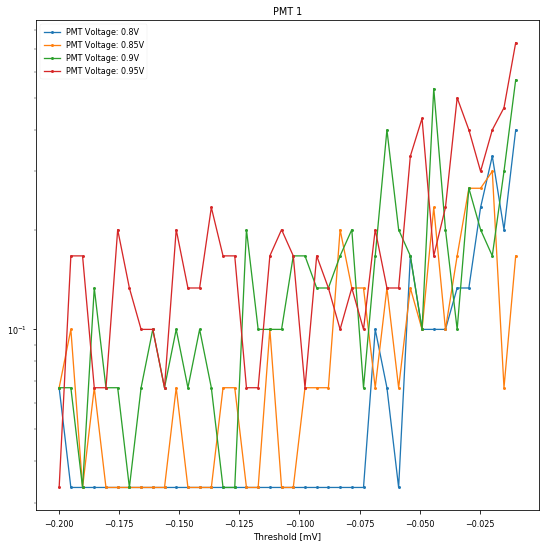

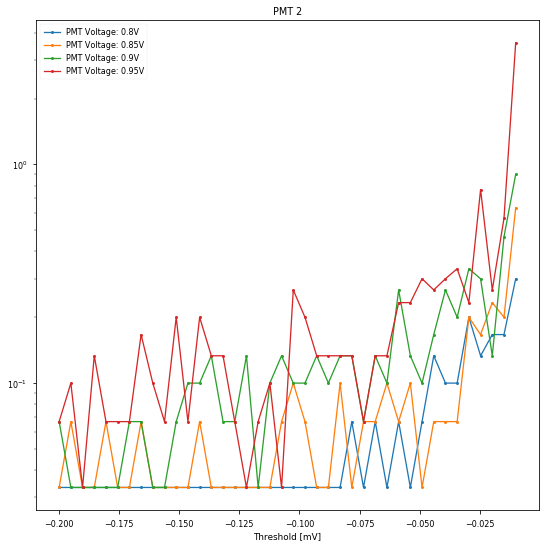

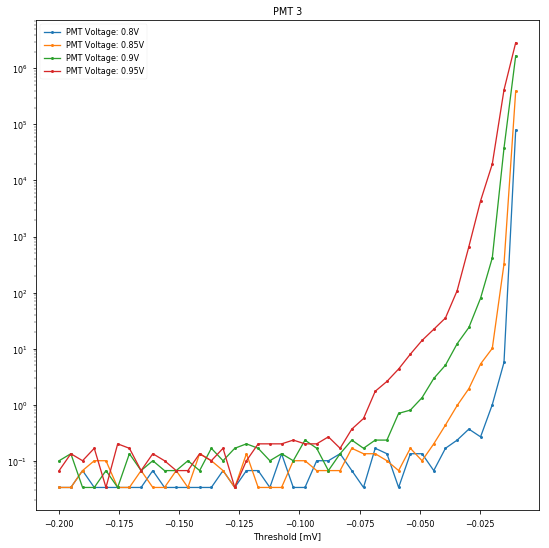

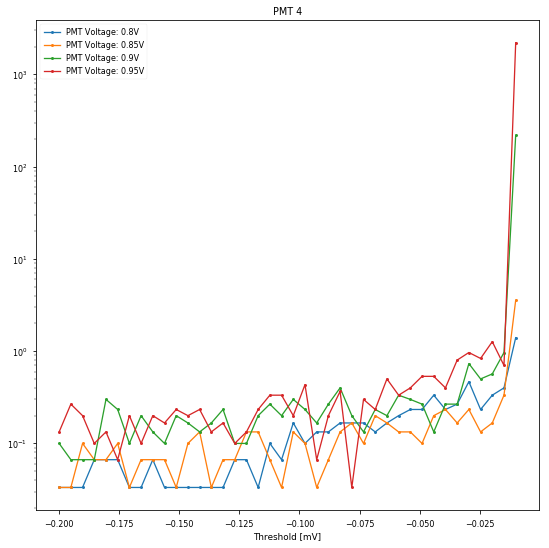

In [471]:
for pmtNr in range(4):
    plt.figure(figsize=(9,9))
    for voltage in voltages:
        plt.plot(threshold, backgrounds[voltage][pmtNr], 'o', label='PMT Voltage: {}V'.format(voltage), markersize = 3, ls='-')

    plt.xlabel('Threshold [mV]')
    plt.title('PMT {}'.format(pmtNr + 1))
    plt.legend(loc='best')
    #plt.xlim(-0.2, -0.02)
    plt.semilogy()
    plt.show()
    

## Dependency on PMT voltage

### Read in data

080819_14
First


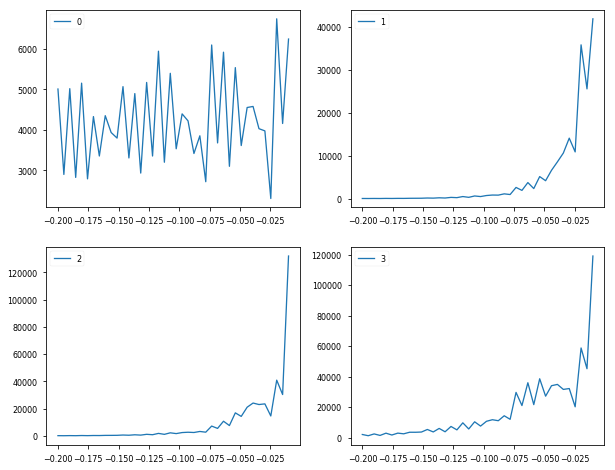

Second


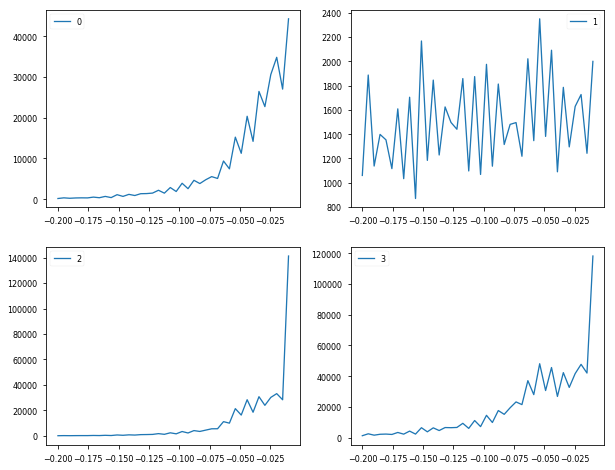

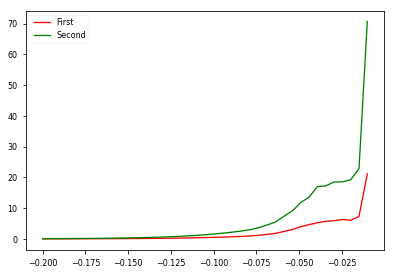

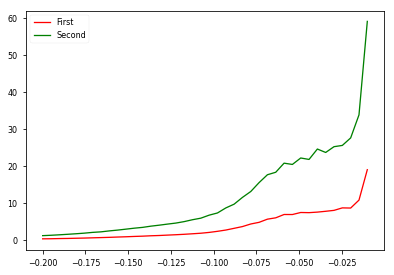

060819_7
First


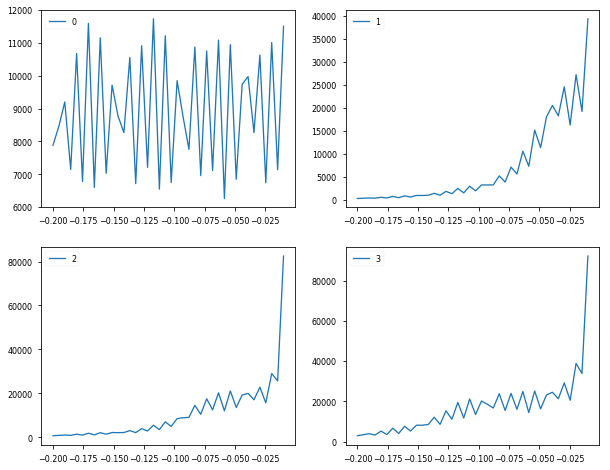

Second


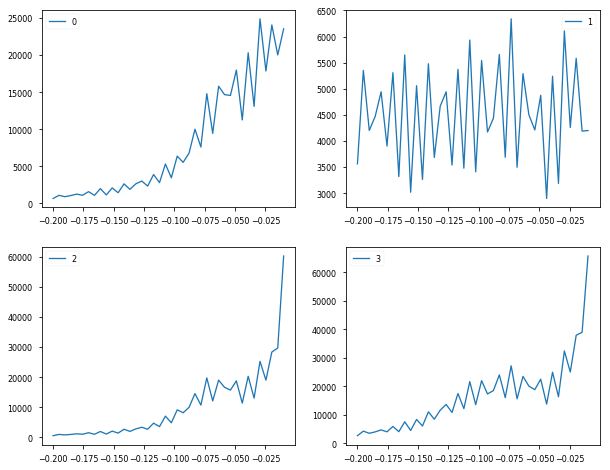

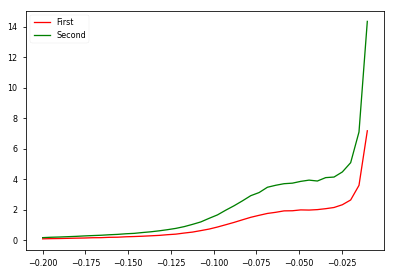

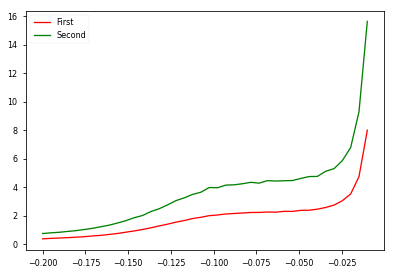

060819_8
First


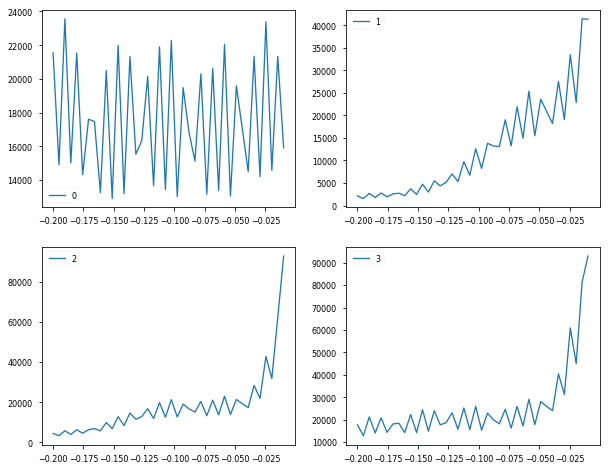

Second


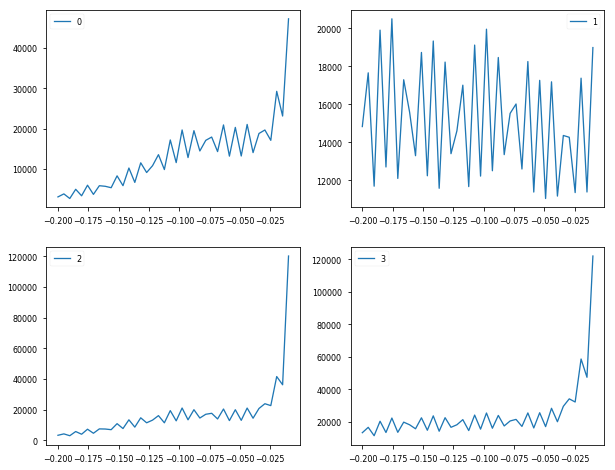

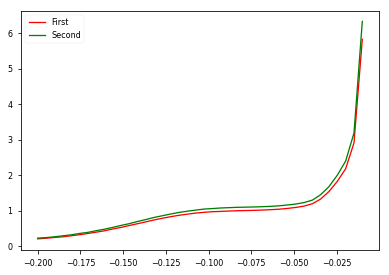

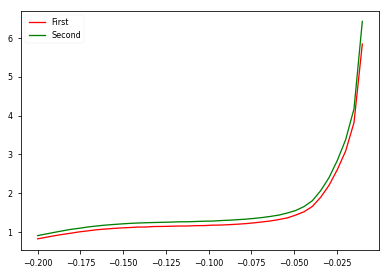

080819_6
First


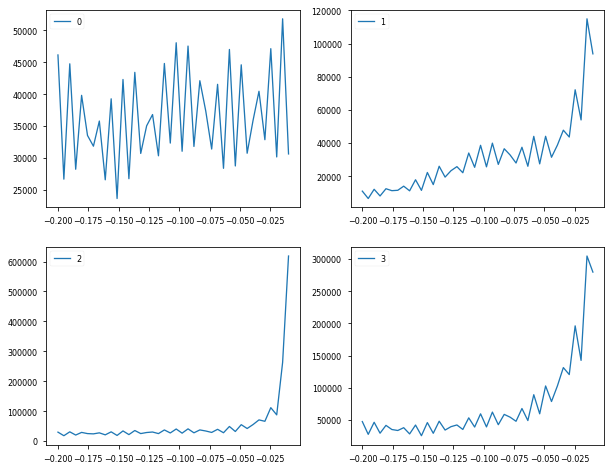

Second


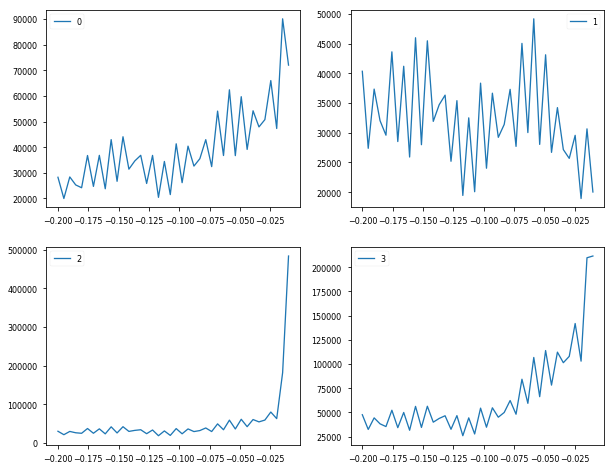

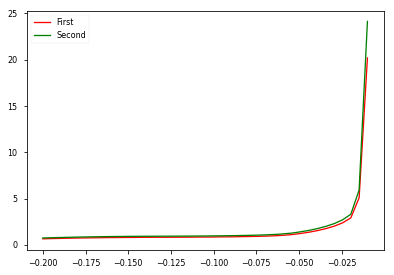

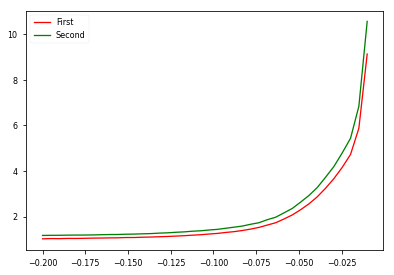

In [382]:
folder = 'data/'
filenames = ['080819_14','060819_7','060819_8', '080819_6']
voltages = [0.8, 0.85, 0.9, 0.95]
rates = {}
k=0
for filename in filenames:
    threshold = np.genfromtxt(os.path.join(folder, filename + '_first.txt'), usecols = 0, skip_header = 6, unpack = True)
    rateFirst = np.genfromtxt(os.path.join(folder, filename + '_first.txt'), usecols = (1,2,3,4), skip_header = 6, unpack = True)
    rateSecond = np.genfromtxt(os.path.join(folder, filename + '_second.txt'), usecols = (1,2,3,4), skip_header = 6, unpack = True)
    print(filename)
    print('First')
    fig, axs = plt.subplots(2,2, figsize=(10,8))
    for i in range(4):
        ax = axs[int(i>1)][int(i%2)]
        ax.plot(threshold, rateFirst[i], label = i)
        ax.legend(loc='best')

    plt.show()
    print('Second')    
    fig, axs = plt.subplots(2,2, figsize=(10,8))
    for i in range(4):
        ax = axs[int(i>1)][int(i%2)]
        ax.plot(threshold, rateSecond[i], label = i)
        #plt.show()
        
        ax.legend(loc='best')
    plt.show()
        
    rate = np.zeros(np.shape(rateFirst))
    for i in range(len(rateFirst)):
        if (i==0):
            rate[i] = (rateSecond[i] - backgrounds[voltages[k]][i]) / rateSecond[1] #* np.mean(rateSecond[1])
        elif (i==1):
            rate[i] = (rateFirst[i] - backgrounds[voltages[k]][i]) / rateFirst[0] #* np.mean(rateFirst[0])
        # average over both measurements if not channel one or two
        else:
            #plt.plot(threshold, rateFirst[i] / rateFirst[0] * np.mean(rateFirst[0]), c='red')
            #plt.plot(threshold, rateSecond[i] / rateSecond[1] * np.mean(rateSecond[1]), c='green')
            plt.plot(threshold, rateFirst[i] / rateFirst[0], c='red', label='First')
            plt.plot(threshold, rateSecond[i] / rateSecond[1], c='green', label='Second')
            plt.legend(loc='best')
            plt.show()
            
            rate[i] = ((rateFirst[i] - backgrounds[voltages[k]][i]) / rateFirst[0] + (rateSecond[i] - backgrounds[voltages[k]][i]) / rateSecond[1]) / 2
            #rate[i] = (rateFirst[i] / rateFirst[0] * np.mean(rateFirst[0]) + rateSecond[i] / rateSecond[1] * np.mean(rateSecond[1])) / 2
            #rate[i] = rateFirst[i] / rateFirst[0] * np.mean(rateFirst[0])
            #rate[i] = rateSecond[i] / rateSecond[1] * np.mean(rateSecond[1]) 
        

    rates[voltages[k]] = rate
    k+=1 

    

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Problem: Voltage is not constant -> constant threshold value doesn't correspond to constant data point -> implement so that reference channel has constant v and thr

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

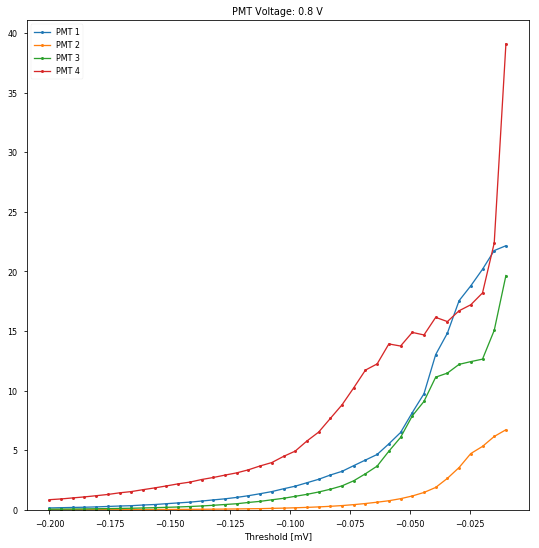

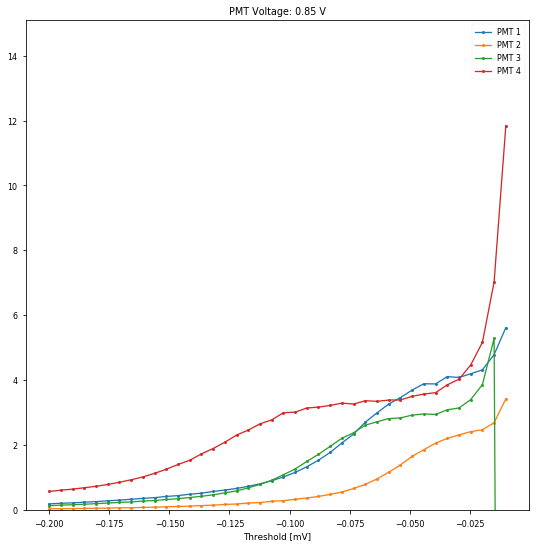

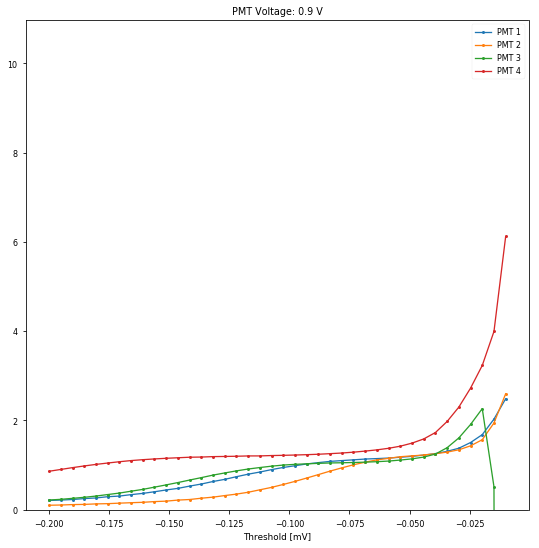

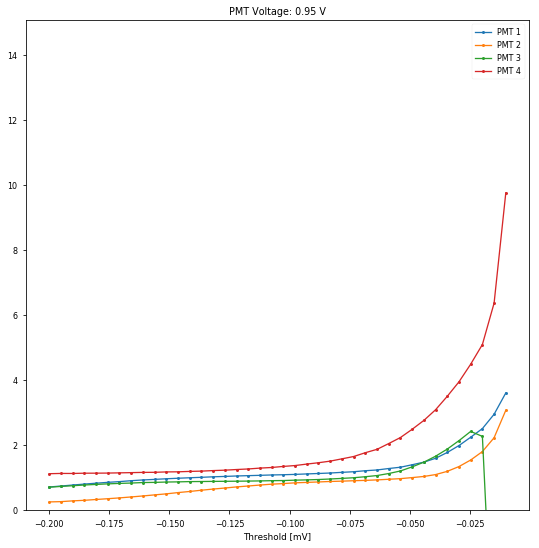

0.7771516901639207


In [383]:
for voltage in voltages:
    plt.figure(figsize=(9,9))
    for pmtNr in range(4):
        plt.plot(threshold, rates[voltage][pmtNr], 'o', label='PMT {}'.format(pmtNr+1), markersize = 3, ls='-')

        #plt.ylim(0,10)


    #plt.semilogy()
    plt.xlabel('Threshold [mV]')
    plt.title('PMT Voltage: {} V'.format(voltage))
    plt.legend(loc='best')
    #plt.xlim(-0.2, -0.02)
    plt.ylim(0)
    plt.show()
    
a = rates[0.9][1][threshold > -0.08][0]
b = rates[0.9][1][threshold > -0.05][0]
print(a/b)

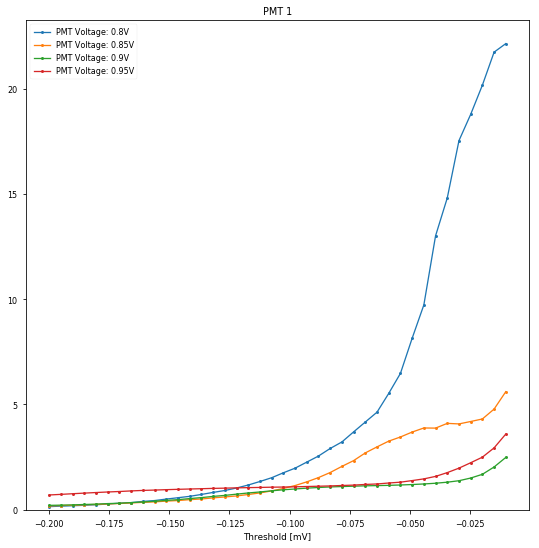

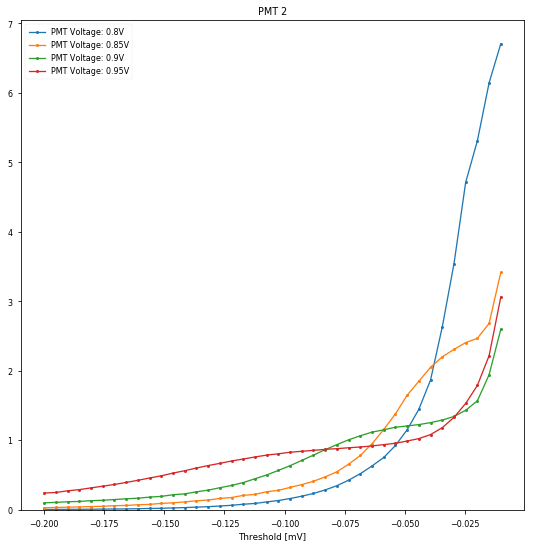

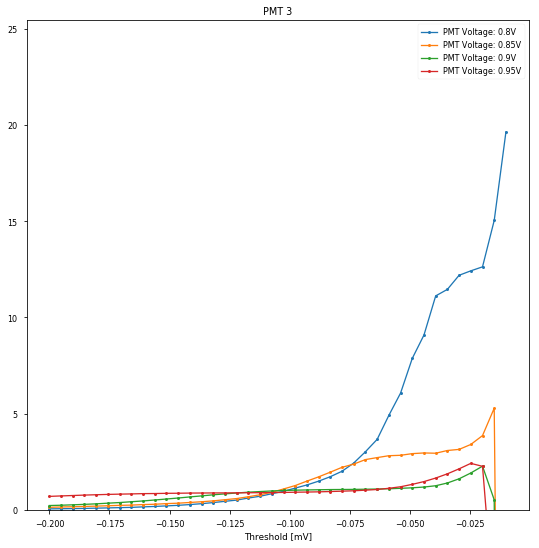

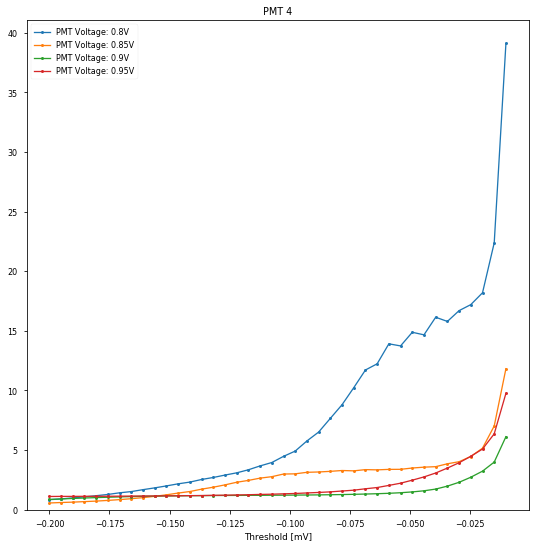

In [332]:
for pmtNr in range(4):
    plt.figure(figsize=(9,9))
    for voltage in voltages:
        plt.plot(threshold, rates[voltage][pmtNr], 'o', label='PMT Voltage: {}V'.format(voltage), markersize = 3, ls='-')

    plt.xlabel('Threshold [mV]')
    plt.title('PMT {}'.format(pmtNr + 1))
    plt.legend(loc='best')
    #if pmtNr == 2:
    #plt.ylim(0,100000)
    #plt.xlim(-0.2, -0.02)
    #plt.semilogy()
    plt.ylim(0)
    plt.show()
    

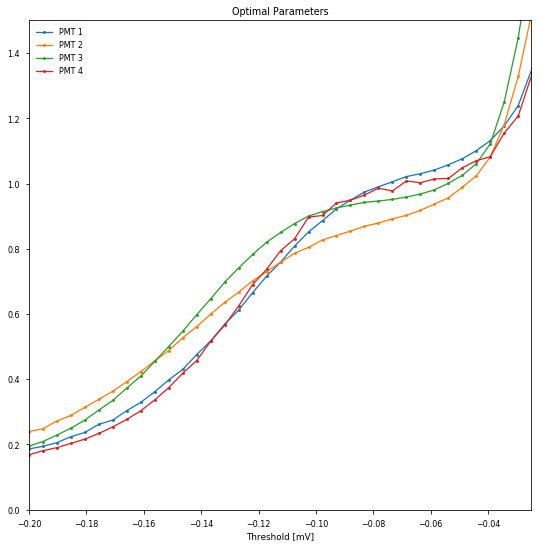

In [392]:
plt.figure(figsize=(9,9))
plt.plot(threshold, rates[0.9][0]*0.9, 'o', label='PMT {}'.format(0 + 1), markersize = 3, ls='-')
plt.plot(threshold, rates[0.95][1], 'o', label='PMT {}'.format(1 + 1), markersize = 3, ls='-')
plt.plot(threshold, rates[0.9][2]*0.9, 'o', label='PMT {}'.format(2 + 1), markersize = 3, ls='-')
plt.plot(threshold, rates[0.85][3]*0.3, 'o', label='PMT {}'.format(3 + 1), markersize = 3, ls='-')

plt.xlabel('Threshold [mV]')
plt.legend(loc='best')
plt.title('Optimal Parameters')
plt.xlim(-0.2, -0.025)
#if pmtNr == 2:
#plt.ylim(0,100000)
#plt.xlim(-0.2, -0.02)
#plt.semilogy()
plt.ylim(0, 1.5)
plt.show()


## New data


In [775]:
folder = 'data/'
filenames = ['160819_1', '160819_2', '160819_3', '160819_4']
voltages = [0.8, 0.85, 0.9, 0.95]
rates = {}
k=0
allRates = np.genfromtxt(os.path.join(folder, '080819_7' + '_OptimizeTrigger_3' + '.txt'), usecols = (1,2,3,4,5,6), skip_header = 7, unpack = True)
conversion = np.mean(allRates[1]) / np.mean(allRates[0])
for filename in filenames:
    threshold = np.genfromtxt(os.path.join(folder, filename + '_first.txt'), usecols = 0, skip_header = 6, unpack = True)
    rateFirst = np.genfromtxt(os.path.join(folder, filename + '_first.txt'), usecols = (1,2,3,4), skip_header = 6, unpack = True)
    rateSecond = np.genfromtxt(os.path.join(folder, filename + '_second.txt'), usecols = (1,2,3,4), skip_header = 6, unpack = True)
        
    rate = np.zeros(np.shape(rateFirst))
    for i in range(len(rateFirst)):
        if (i==0):
            rate[i] = rateSecond[i] / rateSecond[1] * conversion
        else:
            rate[i] = rateFirst[i] / rateFirst[0]
        

    rates[voltages[k]] = rate
    k+=1 

    

In [776]:
print(conversion)

0.9270626041618297


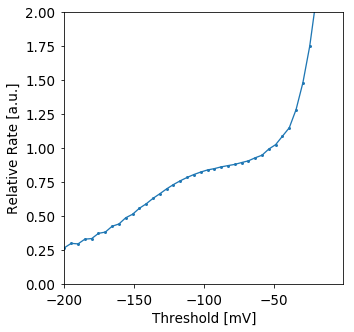

Text(0, 0.5, 'Relative Derivative [a.u.]')

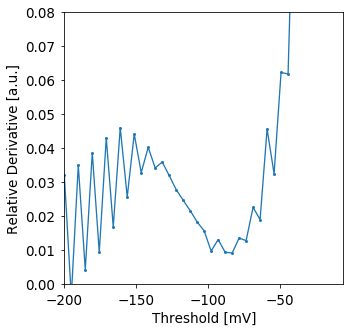

In [769]:
pmtNr = 2
plt.figure(figsize=(5,5))
voltage = 0.9
plt.plot(threshold *1000, rates[voltage][pmtNr], 'o', markersize = 3, ls='-')

plt.xlabel('Threshold [mV]', fontsize=13.5)
plt.ylabel('Relative Rate [a.u.]', fontsize=13.5)
#plt.title('PMT {}'.format(pmtNr + 1))

plt.ylim(0, 2)
plt.xlim(-200)
plt.tick_params(labelsize=13.5)
#plt.savefig('diags/PMT3_rate.pdf', bbox_inches='tight')
plt.show()

plt.figure(figsize=(5,5))
derivative = np.zeros(np.size(rates[voltage][pmtNr])-1)
for i in range(len(rates[voltage][pmtNr]) - 1):
    derivative[i] = rates[voltage][pmtNr][i+1] - rates[voltage][pmtNr][i]
    
plt.plot(threshold[:-1] *1000, derivative, 'o', markersize = 3, ls='-')
plt.ylim(0,0.08)
plt.xlim(-200)
plt.tick_params(labelsize=13.5)
plt.xlabel('Threshold [mV]', fontsize=13.5)
plt.ylabel('Relative Derivative [a.u.]', fontsize=13.5)
    

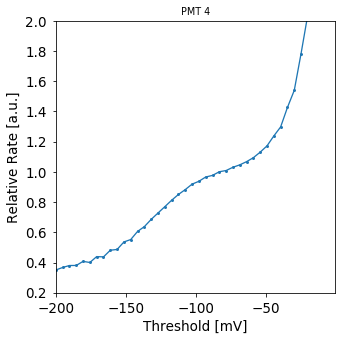

Text(0, 0.5, 'Relative Derivative [a.u.]')

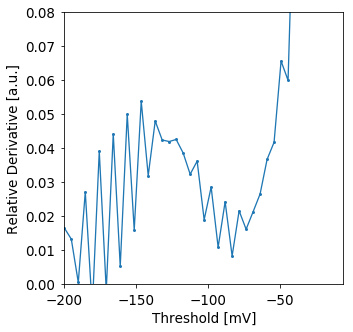

In [770]:
pmtNr = 3
plt.figure(figsize=(5,5))
voltage = 0.85
plt.plot(threshold *1000, rates[voltage][pmtNr], 'o', markersize = 3, ls='-')

plt.xlabel('Threshold [mV]', fontsize=13.5)
plt.ylabel('Relative Rate [a.u.]', fontsize=13.5)
plt.title('PMT {}'.format(pmtNr + 1))

plt.ylim(0.2, 2)
plt.xlim(-200)
plt.tick_params(labelsize=13.5)
plt.show()

plt.figure(figsize=(5,5))

derivative = np.zeros(np.size(rates[voltage][pmtNr])-1)
for i in range(len(rates[voltage][pmtNr]) - 1):
    derivative[i] = rates[voltage][pmtNr][i+1] - rates[voltage][pmtNr][i]
    
plt.plot(threshold[:-1] *1000, derivative, 'o', markersize = 3, ls='-')
plt.ylim(0,0.08)
plt.xlim(-200)
plt.tick_params(labelsize=13.5)
plt.xlabel('Threshold [mV]', fontsize=13.5)
plt.ylabel('Relative Derivative [a.u.]', fontsize=13.5)
    

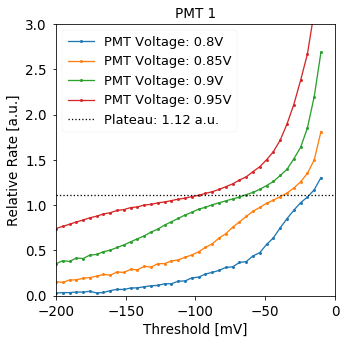

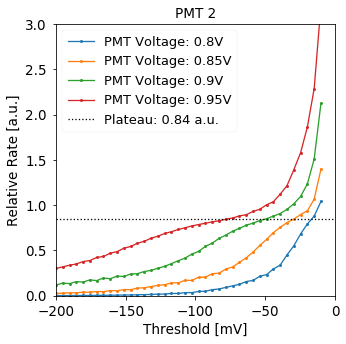

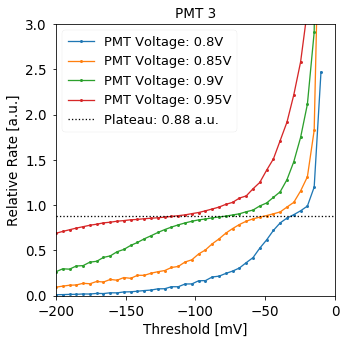

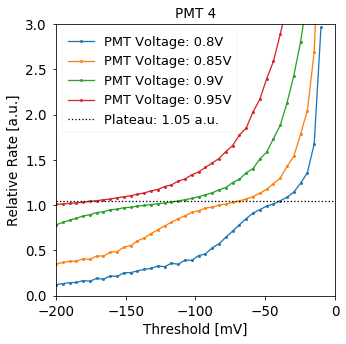

In [771]:
optThresholds = np.array([-64,-78,-78,-68])
voltagesOpt = [0.9,0.95,0.9,0.85]
for pmtNr in range(4):
    plt.figure(figsize=(5,5))
    for voltage in voltages:
        plt.plot(threshold *1000, rates[voltage][pmtNr], 'o', label='PMT Voltage: {}V'.format(voltage), markersize = 3, ls='-')
        if(voltage == voltagesOpt[pmtNr]):
            plateauVal = rates[voltage][pmtNr][np.where(np.abs(threshold*1000 - optThresholds[pmtNr]) == np.min(np.abs(threshold*1000 - optThresholds[pmtNr])))[0][0]]
    plt.plot([-200,0],[plateauVal, plateauVal], c='black', ls=':', label='Plateau: {:.2f} a.u.'.format(plateauVal))
    plt.xlabel('Threshold [mV]', fontsize=13.5)
    plt.ylabel('Relative Rate [a.u.]', fontsize=13.5)
    plt.title('PMT {}'.format(pmtNr + 1), fontsize=13.5)
    plt.legend(loc='best', fontsize=13)
    plt.ylim(0, 3)
    plt.xlim(-200,0)
    plt.tick_params(labelsize=13.5)
    plt.savefig('diags/voltage_dependency_pmt{}.pdf'.format(pmtNr), bbox_inches='tight')
    plt.show()
    

## Subtract background

160819_1
First


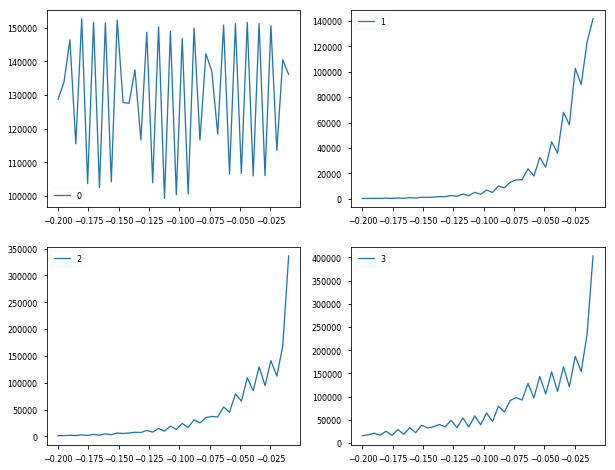

Second


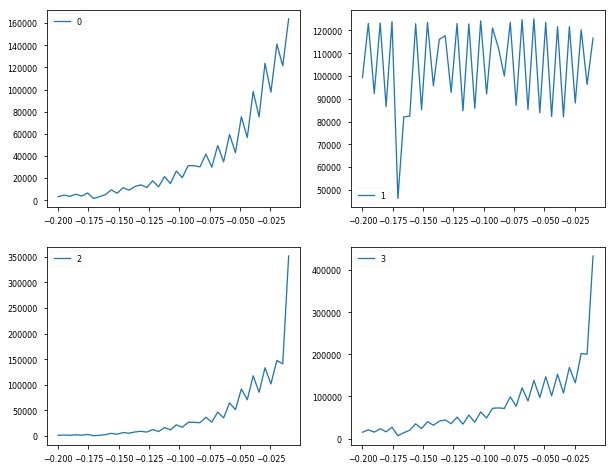

160819_2
First


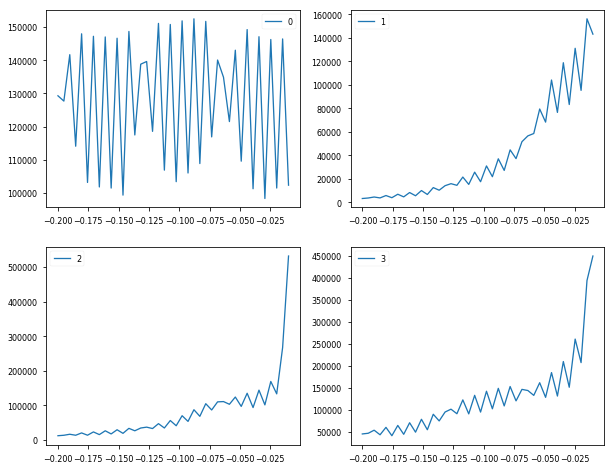

Second


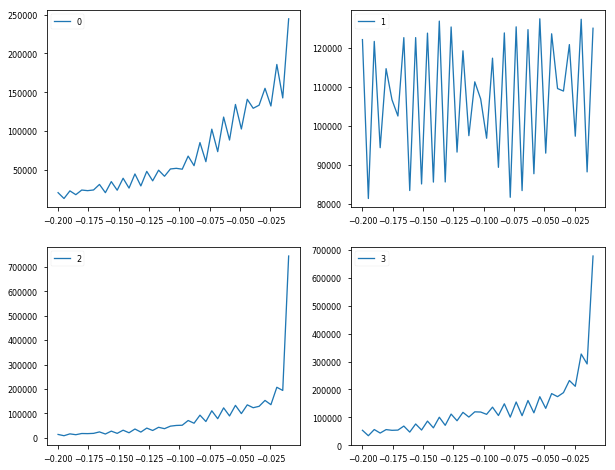

160819_3
First


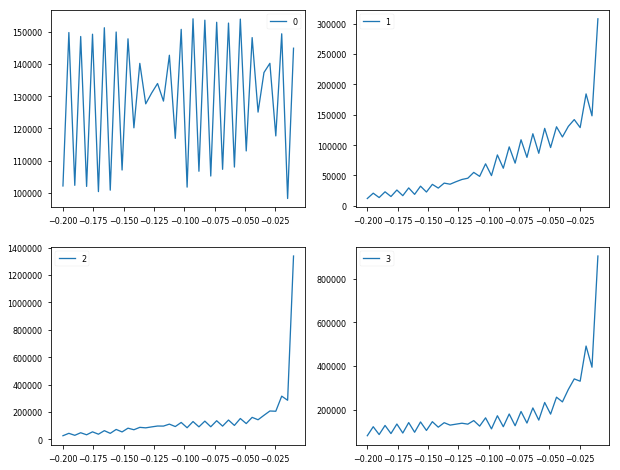

Second


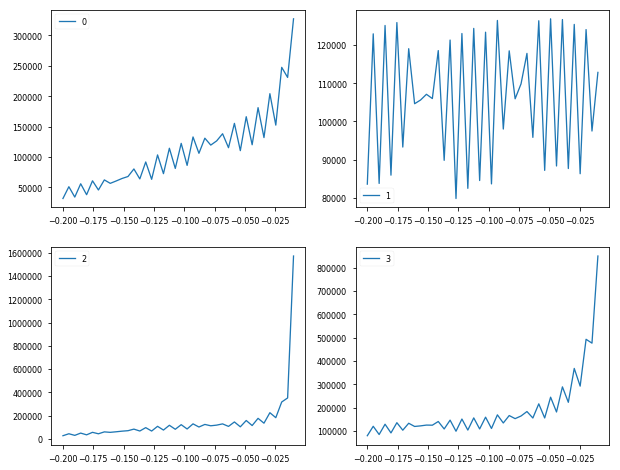

160819_4
First


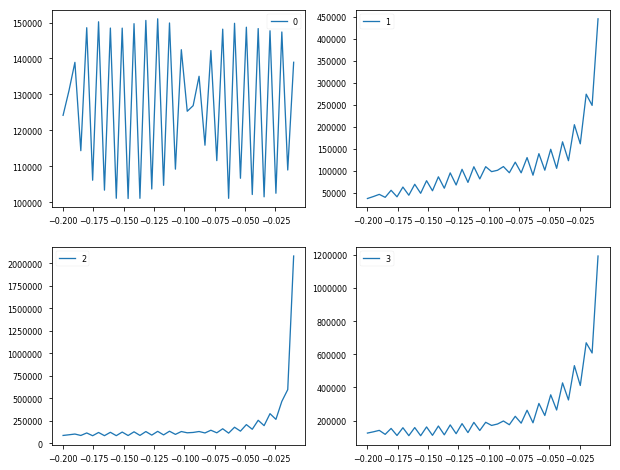

Second


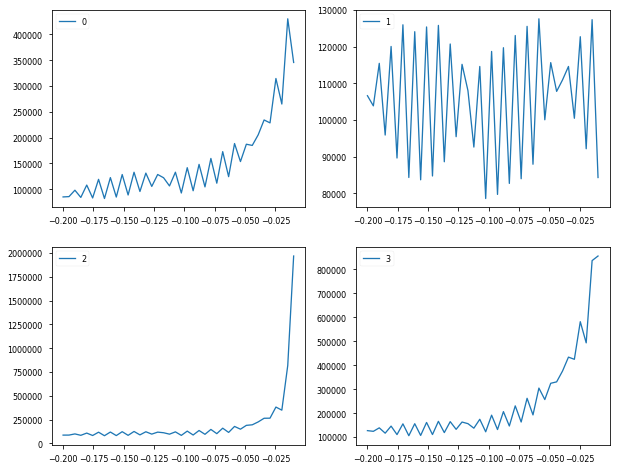

In [475]:
folder = 'data/'
filenames = ['160819_1', '160819_2', '160819_3', '160819_4']
voltages = [0.8, 0.85, 0.9, 0.95]
rates_bg = {}
k=0
for filename in filenames:
    threshold = np.genfromtxt(os.path.join(folder, filename + '_first.txt'), usecols = 0, skip_header = 6, unpack = True)
    rateFirst = np.genfromtxt(os.path.join(folder, filename + '_first.txt'), usecols = (1,2,3,4), skip_header = 6, unpack = True)
    rateSecond = np.genfromtxt(os.path.join(folder, filename + '_second.txt'), usecols = (1,2,3,4), skip_header = 6, unpack = True)
    print(filename)
    print('First')
    fig, axs = plt.subplots(2,2, figsize=(10,8))
    for i in range(4):
        ax = axs[int(i>1)][int(i%2)]
        ax.plot(threshold, rateFirst[i], label = i)
        ax.legend(loc='best')

    plt.show()
    print('Second')    
    fig, axs = plt.subplots(2,2, figsize=(10,8))
    for i in range(4):
        ax = axs[int(i>1)][int(i%2)]
        ax.plot(threshold, rateSecond[i], label = i)
        #plt.show()
        
        ax.legend(loc='best')
    plt.show()
        
    rate = np.zeros(np.shape(rateFirst))
    for i in range(len(rateFirst)):
        if (i==0):
            rate[i] = (rateSecond[i] - backgrounds[voltages[k]][i]) / rateSecond[1] 
        elif (i==1):
            rate[i] = (rateFirst[i] - backgrounds[voltages[k]][i]) / rateFirst[0]
        # average over both measurements if not channel one or two
        else:            
            rate[i] = (rateFirst[i] - backgrounds[voltages[k]][i]) / rateFirst[0]

        

    rates_bg[voltages[k]] = rate
    k+=1 

    

ValueError: x and y must have same first dimension, but have shapes (295,) and (40,)

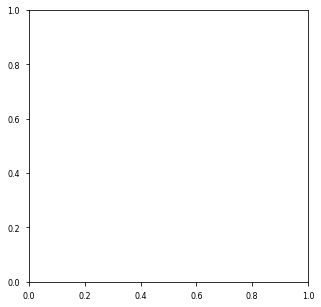

In [546]:
for pmtNr in range(4):
    k=0
    plt.figure(figsize=(5,5))
    for voltage in voltages:
        plt.plot(threshold *1000, rates[voltage][pmtNr], 'o', label='PMT Voltage: {}V'.format(voltage), markersize = 3, ls='-', c=colours[k])
        plt.plot(threshold *1000, rates_bg[voltage][pmtNr], 'o', markersize = 3, ls=':',c=colours[k])
        k+=1
    plt.xlabel('Threshold [mV]', fontsize=13.5)
    plt.ylabel('Relative Rate [a.u.]', fontsize=13.5)
    plt.title('PMT {}'.format(pmtNr + 1))
    plt.legend(loc='best', fontsize=13)
    #if pmtNr == 2:
    #plt.ylim(0,100000)
    #plt.xlim(-0.2, -0.02)
    #plt.semilogy()
    plt.ylim(0, 3)
    plt.xlim(-200)
    plt.tick_params(labelsize=13.5)
    plt.show()
    

# Influence of small changes

In [780]:
for filename in filenames:
    threshold = np.genfromtxt(os.path.join(folder, filename + '_first.txt'), usecols = 0, skip_header = 6, unpack = True)
    rateFirst = np.genfromtxt(os.path.join(folder, filename + '_first.txt'), usecols = (1,2,3,4), skip_header = 6, unpack = True)
    rateSecond = np.genfromtxt(os.path.join(folder, filename + '_second.txt'), usecols = (1,2,3,4), skip_header = 6, unpack = True)

    rate = np.zeros(np.shape(rateFirst))
    rate_error = np.zeros(np.shape(rateFirst))
    for i in range(len(rateFirst)):
        if (i==0):
            rate[i] = (rateSecond[i]) / rateSecond[1]
            rate_error[i] = rate[i] * np.sqrt(1/rateSecond[i] + 1/rateSecond[1])
            
        elif (i==1):
            rate[i] = rateFirst[i] / rateFirst[0]
            rate_error[i] = rate[i] * np.sqrt(1/rateFirst[i] + 1/rateFirst[0])
        # average over both measurements if not channel one or two
        else:
            rate[i] = rateSecond[i] / rateSecond[1]
            rate_error[i] = rate[i] * np.sqrt(1/rateSecond[i] + 1/rateSecond[1])
        
    rates.append(rate)
    rates_error.append(rate_error)
    
rates = np.array(rates)    
rates_error = np.array(rates_error)


folder = 'data/'
filenames = ['070819_3', '080819_7']
rates_old = []
rates_old_error = []
filename = filenames[1]


threshold = np.genfromtxt(os.path.join(folder, filename + '_OptimizeTrigger_1.txt'), usecols = 0, skip_header = 7, unpack = True)

allRates = np.genfromtxt(os.path.join(folder, filename + '_OptimizeTrigger_3' + '.txt'), usecols = (1,2,3,4,5,6), skip_header = 7, unpack = True)
conversion = np.mean(allRates[1]) / np.mean(allRates[0])

for channel in range(4):    
    allRates = np.genfromtxt(os.path.join(folder, filename + '_OptimizeTrigger_' + str(channel+1) + '.txt'), usecols = (1,2,3,4,5,6), skip_header = 7, unpack = True)

    if(channel == 0):
        rate = allRates[4] / allRates[1] * conversion #* np.mean(allRates[1])
        rate_error = rate * np.sqrt(1/allRates[4] + 1/allRates[1])
    else:
        rate = allRates[4] / allRates[0] #* np.mean(allRates[0])
        rate_error = rate * np.sqrt(1/allRates[4] + 1/allRates[0])

    rates_old.append(rate)
    rates_old_error.append(rate_error)
    
rates_old = np.array(rates_old) 
rates_old_error = np.array(rates_old_error) 
    

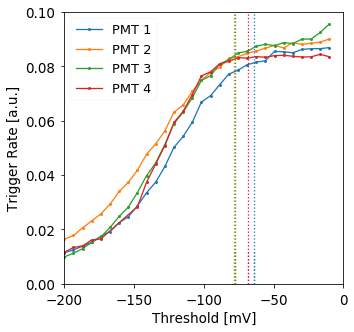

In [792]:
plt.figure(figsize=(5,5))
optThresholds = np.array([-64,-78,-77.3,-68])
for i in range(4):
    if (i==3):
        plt.plot(threshold[(threshold<=-0.17) | (threshold>=-0.15)]*1e3, rates_old[i][(threshold<=-0.17) | (threshold>=-0.15)], 'o',label='PMT {}'.format(i+1), ls='-', markersize=3)
    else:
        plt.plot(threshold*1e3, rates_old[i], 'o',label='PMT {}'.format(i+1), ls='-', markersize=3)

for channelNo in range(4):
    plt.plot([optThresholds[channelNo],optThresholds[channelNo]], [0,0.012], ls=':', c=colours[channelNo])
    
plt.legend(loc='best')
plt.ylabel('Trigger Rate [a.u.]', fontsize=13.5)
plt.xlabel('Threshold [mV]', fontsize=13.5)
for channelNo in range(4):
    plt.plot([optThresholds[channelNo],optThresholds[channelNo]], [0,0.1], ls=':', c=colours[channelNo])

plt.legend(loc='best', fontsize=13)

plt.xlim(-200, 0)
plt.ylim(0,0.1)
plt.tick_params(labelsize=13.5)
#plt.savefig('diags/trigger_rate.pdf', bbox_inches='tight')

In [702]:
folder = 'data/'
filenames = ['070819_3', '080819_7']
rates = []
filename = filenames[1]


threshold = np.genfromtxt(os.path.join(folder, filename + '_OptimizeTrigger_1.txt'), usecols = 0, skip_header = 7, unpack = True)

allRates = np.genfromtxt(os.path.join(folder, filename + '_OptimizeTrigger_3' + '.txt'), usecols = (1,2,3,4,5,6), skip_header = 7, unpack = True)
conversion = np.mean(allRates[1]) / np.mean(allRates[0])

for channel in range(4):    
    allRates = np.genfromtxt(os.path.join(folder, filename + '_OptimizeTrigger_' + str(channel+1) + '.txt'), usecols = (1,2,3,4,5,6), skip_header = 7, unpack = True)

    if(channel == 0):
        #Conversion: Remove difference due to different plateaus
        rate = allRates[channel] / allRates[1] * conversion #* np.mean(allRates[1])
    else:
        rate = allRates[channel] / allRates[0] #* np.mean(allRates[0])

    rates.append(rate)
    
rates = np.array(rates)    
    

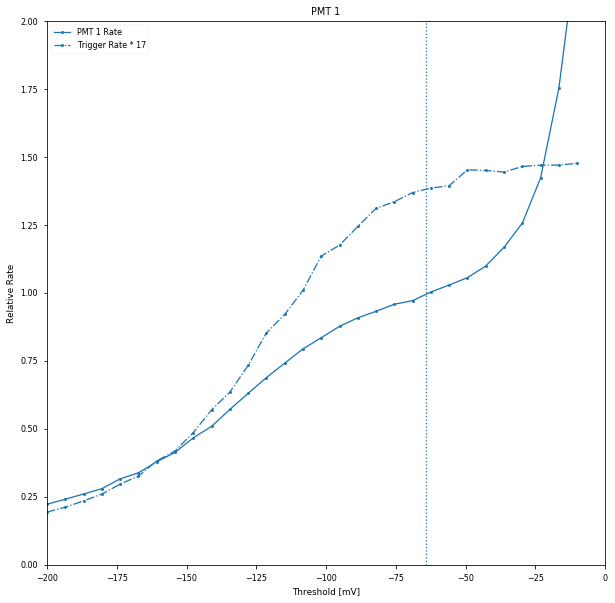

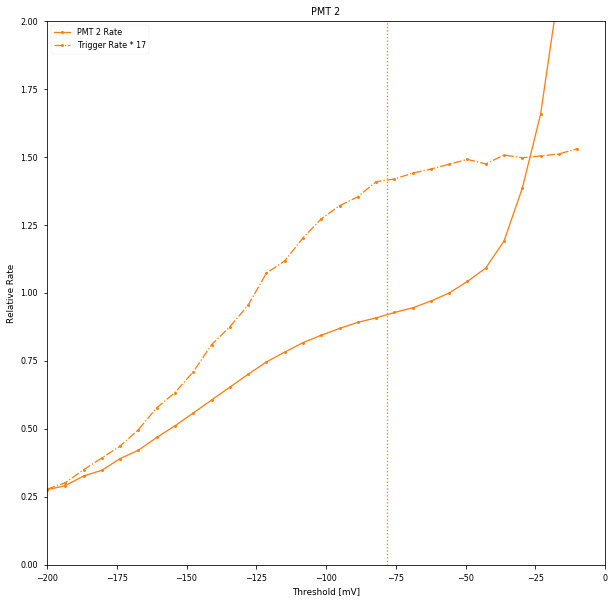

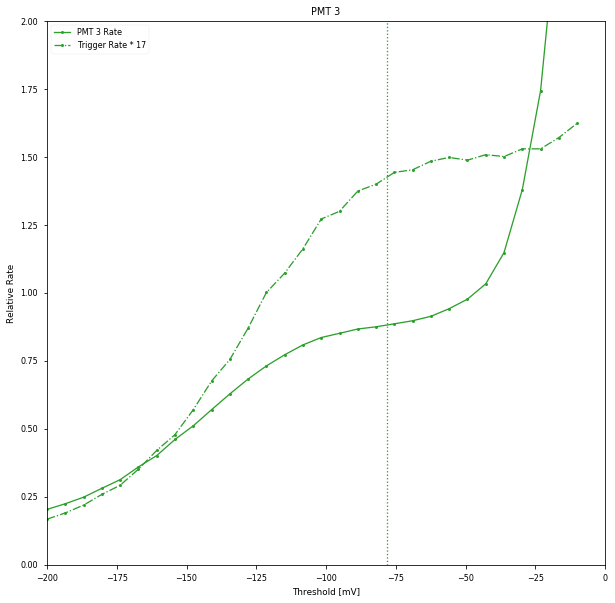

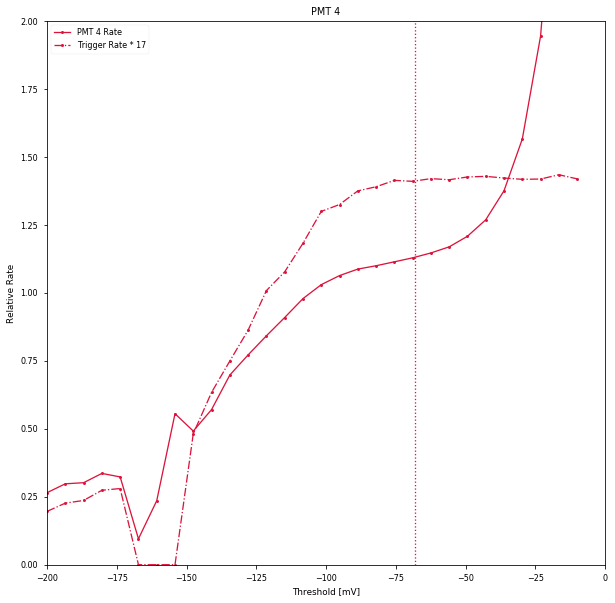

In [714]:
optThresholds = np.array([-64,-78,-78,-68])
for i in range(len(rates)):
    plt.figure(figsize=(10,10))
    plt.title('PMT {}'.format(i+1))
    plt.plot(threshold*1e3, rates[i], 'o',label='PMT {} Rate'.format(i+1), ls='-', markersize=3, c=colours[i])
    plt.plot(threshold*1e3, rates_old[i]*17, 'o', label='Trigger Rate * 17',ls='-.', markersize=3, c=colours[i])
    plt.plot([optThresholds[i],optThresholds[i]], [0,3], ls=':', c=colours[i])
    plt.legend(loc='best')
    plt.ylabel('Relative Rate')
    plt.xlabel('Threshold [mV]')
    plt.xlim(-200,0)
    plt.ylim(0,2)
    plt.show()


## Trigger Rate

In [715]:
folder = 'data/'
filenames = ['200819_1', '200819_2', '200819_3', '200819_4']
voltages = [0.8, 0.85, 0.9, 0.95]
triggerRates = {}
k=0

thresholdTriggerRates = np.genfromtxt(os.path.join(folder, filenames[0] + '_OptimizeTrigger_1.txt'), usecols = 0, skip_header = 7, unpack = True)


allRates = np.genfromtxt(os.path.join(folder, '080819_7' + '_OptimizeTrigger_3' + '.txt'), usecols = (1,2,3,4,5,6), skip_header = 7, unpack = True)
conversion = np.mean(allRates[1]) / np.mean(allRates[0])

for filename in filenames:
    for channelNo in range(4):
        allRates = np.genfromtxt(os.path.join(folder, filename + '_OptimizeTrigger_' + str(channelNo+1) + '.txt'), usecols = (1,2,3,4,5,6), skip_header = 7, unpack = True)

        if(channelNo == 0):
            #Conversion: Remove difference due to different plateaus
            rate = allRates[4] / allRates[1] * conversion 
        else:
            rate = allRates[4] / allRates[0] 

        triggerRates[channelNo, voltages[k]] = rate
    k+=1
   

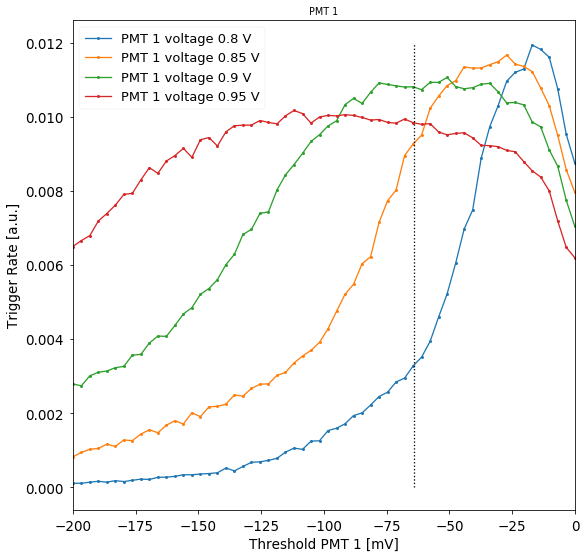

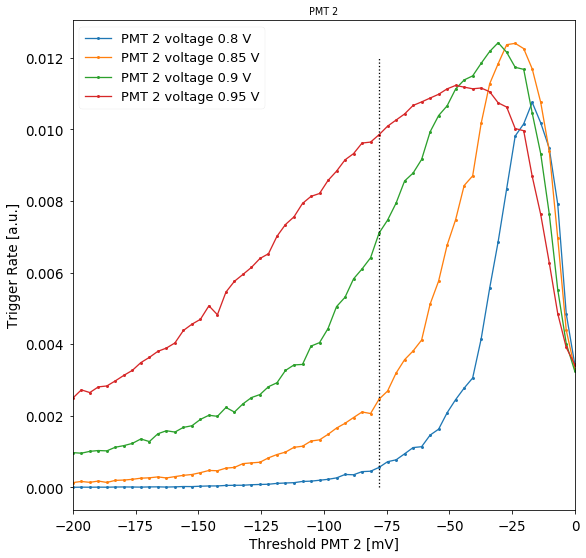

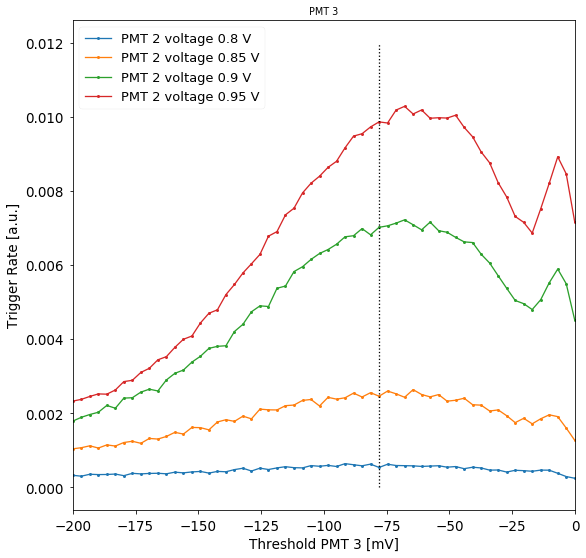

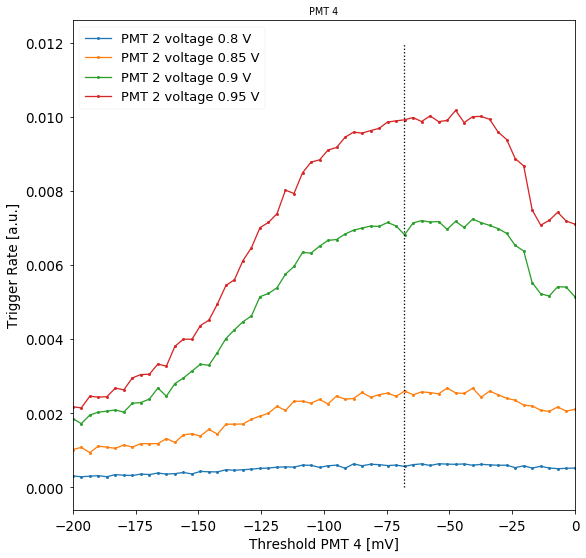

In [716]:
optThresholds = np.array([-64,-78,-78,-68])
for channelNo in range(4):
    plt.figure(figsize=(9,9))
    for voltage in voltages:
        if (channelNo<2):
            plt.plot(thresholdTriggerRates*1e3, triggerRates[channelNo, voltage], 'o', ls='-', markersize=3,label='PMT {} voltage {} V'.format(channelNo+1, voltage))
        else:
            plt.plot(thresholdTriggerRates*1e3, triggerRates[channelNo, voltage], 'o', ls='-', markersize=3,label='PMT 2 voltage {} V'.format(voltage))

    plt.title('PMT {}'.format(channelNo+1))
    plt.legend(loc='best')
    plt.xlabel('Threshold PMT {} [mV]'.format(channelNo+1), fontsize=13.5)
    plt.ylabel('Trigger Rate [a.u.]', fontsize=13.5)
    plt.plot([optThresholds[channelNo],optThresholds[channelNo]], [0,0.012], ls=':', c='k')

    plt.legend(loc='best', fontsize=13)

    plt.xlim(-200, 0)
    plt.tick_params(labelsize=13.5)
    plt.show()

## Optimal voltages

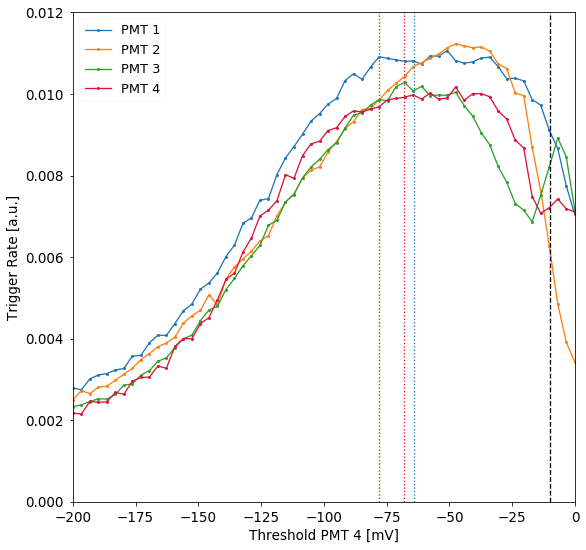

In [717]:
optThresholds = np.array([-64,-78,-78,-68])
plt.figure(figsize=(9,9))

channelNo = 0
voltage=0.9
plt.plot(thresholdTriggerRates*1e3, triggerRates[channelNo, voltage], 'o', ls='-', markersize=3,label='PMT {}'.format(channelNo+1), c=colours[0])

channelNo = 1
voltage=0.95
plt.plot(thresholdTriggerRates*1e3, triggerRates[channelNo, voltage], 'o', ls='-', markersize=3,label='PMT {}'.format(channelNo+1), c=colours[1])

channelNo = 2
voltage=0.95
plt.plot(thresholdTriggerRates*1e3, triggerRates[channelNo, voltage], 'o', ls='-', markersize=3,label='PMT {}'.format(channelNo+1), c=colours[2])

channelNo = 3
voltage=0.95
plt.plot(thresholdTriggerRates*1e3, triggerRates[channelNo, voltage], 'o', ls='-', markersize=3,label='PMT {}'.format(channelNo+1), c=colours[3])




plt.legend(loc='best')
plt.xlabel('Threshold PMT {} [mV]'.format(channelNo+1), fontsize=13.5)
plt.ylabel('Trigger Rate [a.u.]', fontsize=13.5)
for channelNo in range(4):
    plt.plot([optThresholds[channelNo],optThresholds[channelNo]], [0,0.012], ls=':', c=colours[channelNo])
plt.plot([-10,-10], [0,0.012], ls='--', c='k')

plt.legend(loc='best', fontsize=13)

plt.xlim(-200, 0)
plt.ylim(0,0.012)
plt.tick_params(labelsize=13.5)
plt.show()

## Compare to old measurement

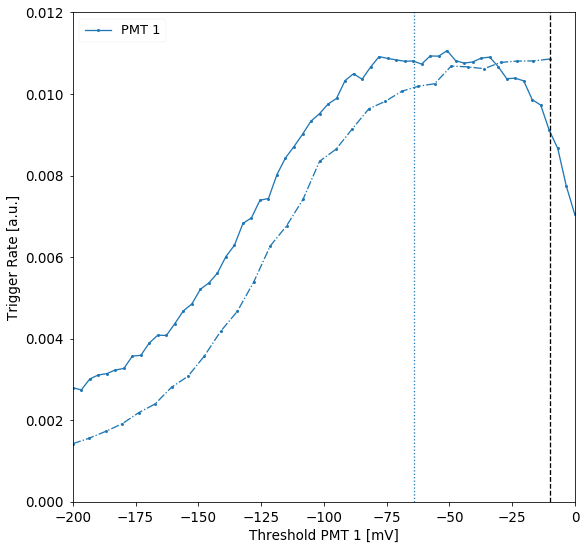

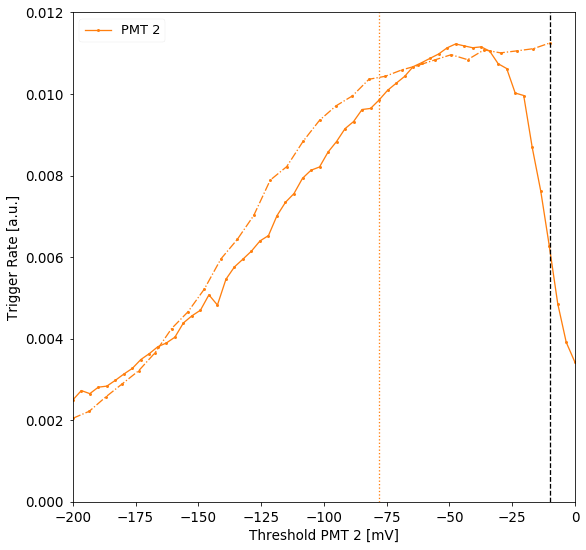

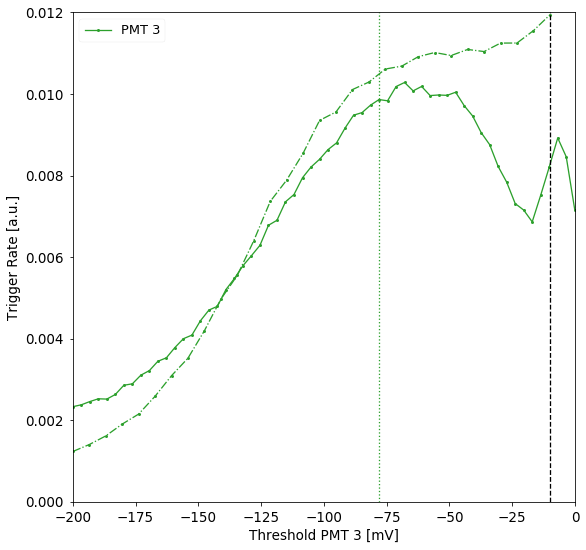

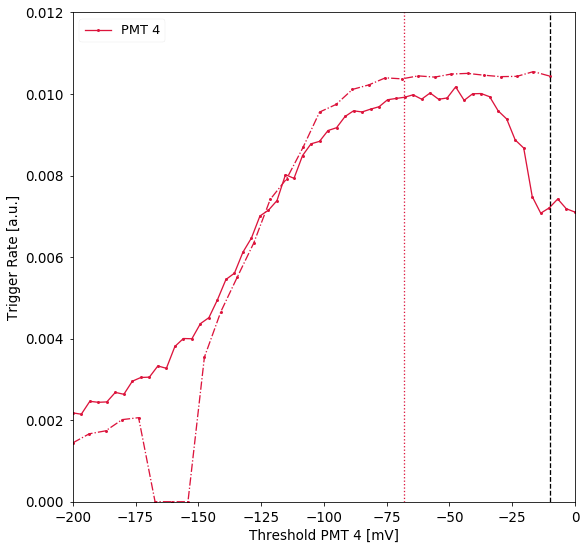

In [604]:
optThresholds = np.array([-64,-78,-78,-68])

voltagesOpt = [0.9,0.95,0.95,0.95]

for channelNo in range(4):
    plt.figure(figsize=(9,9))
    voltage=voltagesOpt[channelNo]
    plt.plot(thresholdTriggerRates*1e3, triggerRates[channelNo, voltage], 'o', ls='-', markersize=3,label='PMT {}'.format(channelNo+1), c=colours[channelNo])
    plt.plot(threshold*1e3, rates[channelNo]/8,'o', ls='-.', markersize=3, c=colours[channelNo])
    plt.plot([optThresholds[channelNo],optThresholds[channelNo]], [0,0.012], ls=':', c=colours[channelNo])

    plt.legend(loc='best')
    plt.xlabel('Threshold PMT {} [mV]'.format(channelNo+1), fontsize=13.5)
    plt.ylabel('Trigger Rate [a.u.]', fontsize=13.5)

    plt.plot([-10,-10], [0,0.012], ls='--', c='k')

    plt.legend(loc='best', fontsize=13)

    plt.xlim(-200, 0)
    plt.ylim(0,0.012)
    plt.tick_params(labelsize=13.5)
    plt.show()



## Single Channel characteristics

In [605]:
folder = 'data/'
filenames = ['200819_1', '200819_2', '200819_3', '200819_4']
voltages = [0.8, 0.85, 0.9, 0.95]
rates = {}
k=0

threshold = np.genfromtxt(os.path.join(folder, filenames[0] + '_OptimizeTrigger_1.txt'), usecols = 0, skip_header = 7, unpack = True)


allRates = np.genfromtxt(os.path.join(folder, '080819_7' + '_OptimizeTrigger_3' + '.txt'), usecols = (1,2,3,4,5,6), skip_header = 7, unpack = True)
conversion = np.mean(allRates[1]) / np.mean(allRates[0])

for filename in filenames:
    for channelNo in range(4):
        
        allRates = np.genfromtxt(os.path.join(folder, filename + '_OptimizeTrigger_' + str(channelNo+1) + '.txt'), usecols = (1,2,3,4,5,6), skip_header = 7, unpack = True)

        if(channelNo == 0):
            #Conversion: Remove difference due to different plateaus
            rate = allRates[0] / allRates[1] * conversion 
        else:
            rate = allRates[channelNo] / allRates[0] 

        rates[channelNo, voltages[k]] = rate
    k+=1
   

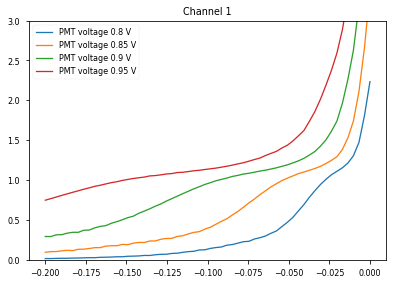

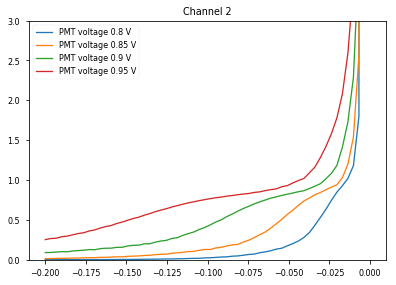

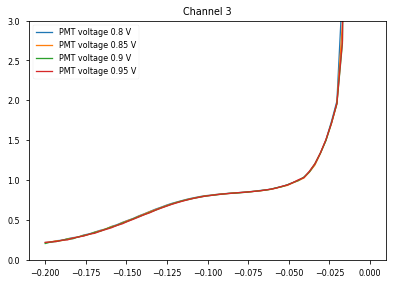

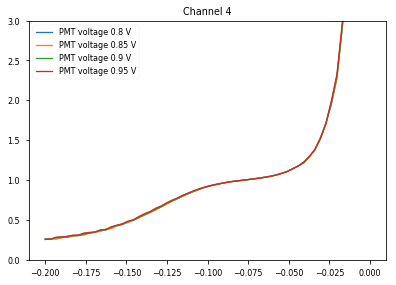

In [606]:
for channelNo in range(4):
    for voltage in voltages:
        plt.plot(threshold, rates[channelNo, voltage], label='PMT voltage {} V'.format(voltage))

    plt.title('Channel {}'.format(channelNo+1))
    plt.legend(loc='best')
    plt.ylim(0,3)
    plt.show()

## Compare Rate and Trigger Rate

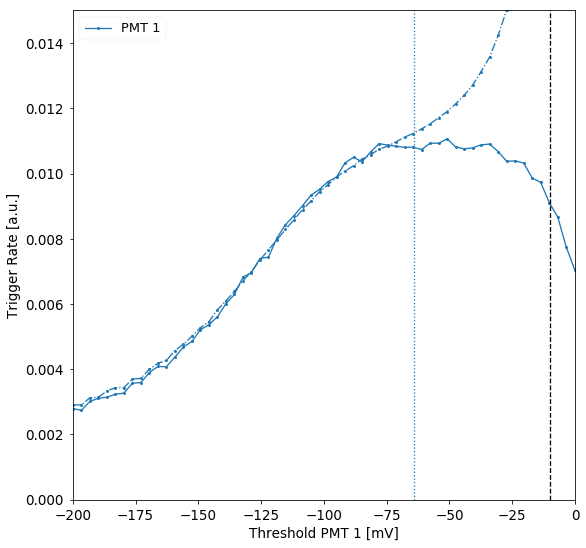

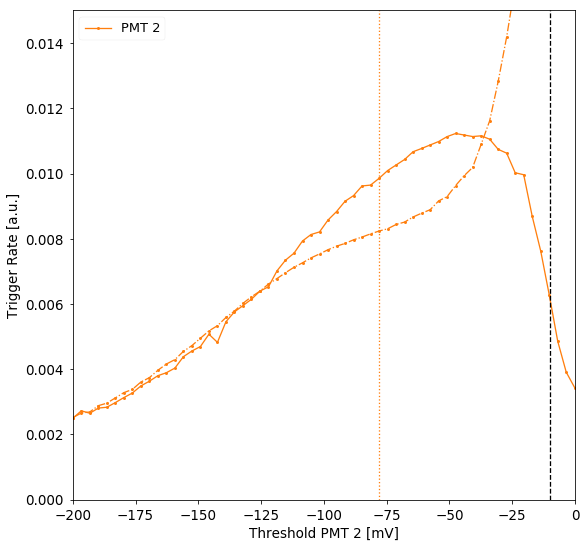

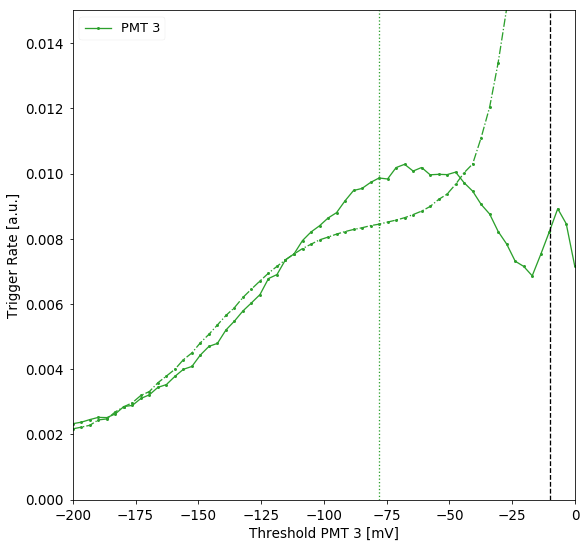

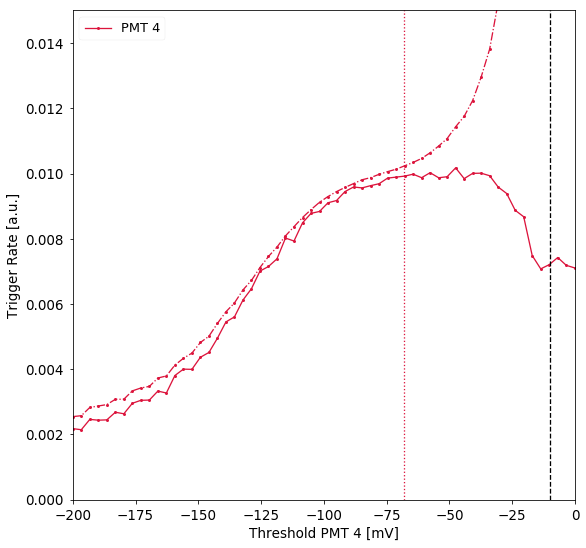

In [612]:
optThresholds = np.array([-64,-78,-78,-68])

voltagesOpt = [0.9,0.95,0.95,0.95]

for channelNo in range(4):
    plt.figure(figsize=(9,9))
    voltage=voltagesOpt[channelNo]
    plt.plot(thresholdTriggerRates*1e3, triggerRates[channelNo, voltage], 'o', ls='-', markersize=3,label='PMT {}'.format(channelNo+1), c=colours[channelNo])
    plt.plot(threshold*1e3, rates[channelNo, voltage]/1e2,'o', ls='-.', markersize=3, c=colours[channelNo])
    plt.plot([optThresholds[channelNo],optThresholds[channelNo]], [0,0.015], ls=':', c=colours[channelNo])

    plt.legend(loc='best')
    plt.xlabel('Threshold PMT {} [mV]'.format(channelNo+1), fontsize=13.5)
    plt.ylabel('Trigger Rate [a.u.]', fontsize=13.5)

    plt.plot([-10,-10], [0,0.015], ls='--', c='k')

    plt.legend(loc='best', fontsize=13)

    plt.xlim(-200, 0)
    plt.ylim(0,0.015)
    plt.tick_params(labelsize=13.5)
    plt.show()




# Influence of energy


PMT 1 seems to depend on the energy (?)

In [777]:
folder = 'data/'
filenames = ['080819_5', '080819_1', '080819_2', '070819_4', '070819_5', '080819_4']
energies = [1,2,3,4,5,6]
rates = []
rates_error = []
for filename in filenames:
    threshold = np.genfromtxt(os.path.join(folder, filename + '_first.txt'), usecols = 0, skip_header = 6, unpack = True)
    rateFirst = np.genfromtxt(os.path.join(folder, filename + '_first.txt'), usecols = (1,2,3,4), skip_header = 6, unpack = True)
    rateSecond = np.genfromtxt(os.path.join(folder, filename + '_second.txt'), usecols = (1,2,3,4), skip_header = 6, unpack = True)

    rate = np.zeros(np.shape(rateFirst))
    rate_error = np.zeros(np.shape(rateFirst))
    for i in range(len(rateFirst)):
        if (i==0):
            rate[i] = (rateSecond[i]) / rateSecond[1]
            rate_error[i] = rate[i] * np.sqrt(1/rateSecond[i] + 1/rateSecond[1])
            
        elif (i==1):
            rate[i] = rateFirst[i] / rateFirst[0]
            rate_error[i] = rate[i] * np.sqrt(1/rateFirst[i] + 1/rateFirst[0])
        # average over both measurements if not channel one or two
        else:
            rate[i] = rateSecond[i] / rateSecond[1]
            rate_error[i] = rate[i] * np.sqrt(1/rateSecond[i] + 1/rateSecond[1])
        
    rates.append(rate)
    rates_error.append(rate_error)
    
rates = np.array(rates)    
rates_error = np.array(rates_error)
    

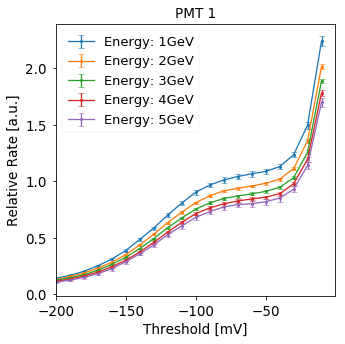

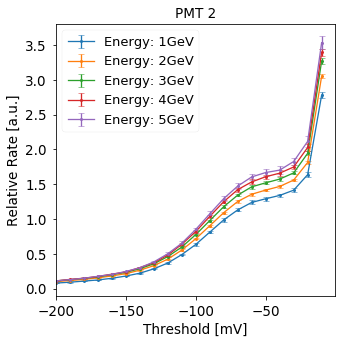

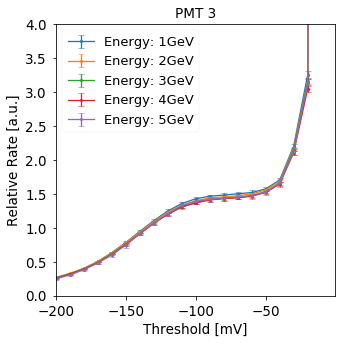

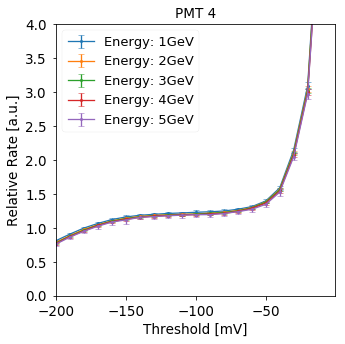

In [778]:
for pmtNr in range(np.shape(rates)[1]):
    plt.figure(figsize=(5,5))
    for energyNr in range(5):
        plt.errorbar(threshold*1000, rates[energyNr][pmtNr], yerr=rates_error[energyNr][pmtNr], label='Energy: {}GeV'.format(energies[energyNr]), marker='o', markersize = 3, ls='-', capsize=3,capthick=.5)
        #plt.show()
    if(pmtNr>1):
        plt.ylim(0,4)

    
    plt.xlabel('Threshold [mV]', fontsize=13.5)
    plt.ylabel('Relative Rate [a.u.]', fontsize=13.5)
    plt.title('PMT {}'.format(pmtNr + 1), fontsize=13.5)
    plt.legend(loc='best', fontsize=13)
    plt.xlim(-200)
    plt.tick_params(labelsize=13.5)
    plt.savefig('diags/energy_dependence_pmt{}.pdf'.format(pmtNr), bbox_inches='tight')
    plt.show()
    

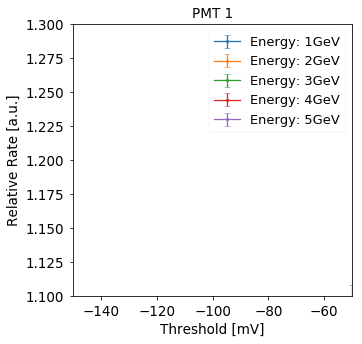

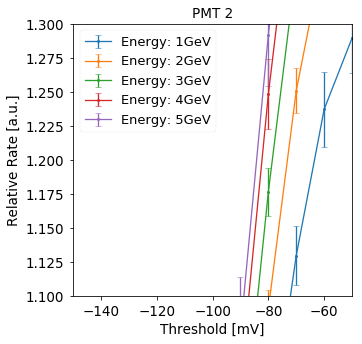

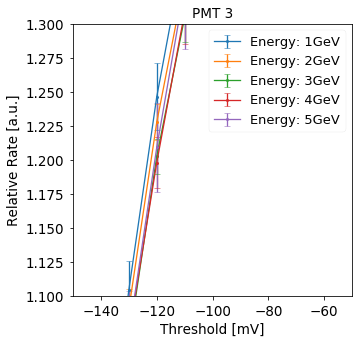

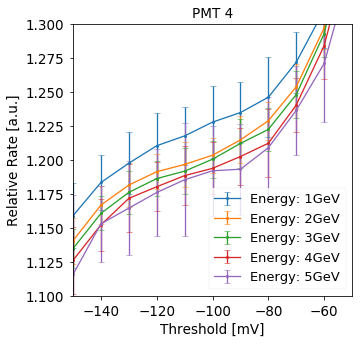

In [779]:
for pmtNr in range(np.shape(rates)[1]):
    plt.figure(figsize=(5,5))
    for energyNr in range(5):
        plt.errorbar(threshold*1000, rates[energyNr][pmtNr], yerr=rates_error[energyNr][pmtNr], label='Energy: {}GeV'.format(energies[energyNr]), marker='o', markersize = 3, ls='-', capsize=3,capthick=.5)
        #plt.show()
    if(pmtNr>1):
        plt.ylim(0,4)

    
    plt.xlabel('Threshold [mV]', fontsize=13.5)
    plt.ylabel('Relative Rate [a.u.]', fontsize=13.5)
    plt.title('PMT {}'.format(pmtNr + 1), fontsize=13.5)
    plt.legend(loc='best', fontsize=13)
    plt.xlim(-150,-50)
    plt.ylim(1.1,1.3)
    plt.tick_params(labelsize=13.5)
    plt.show()
    

080819_13
First


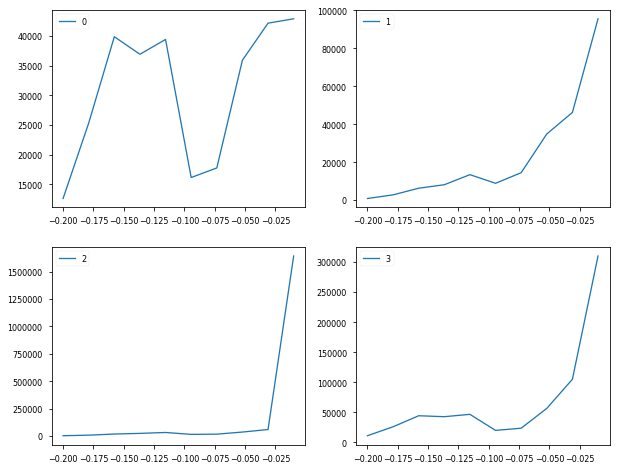

Second


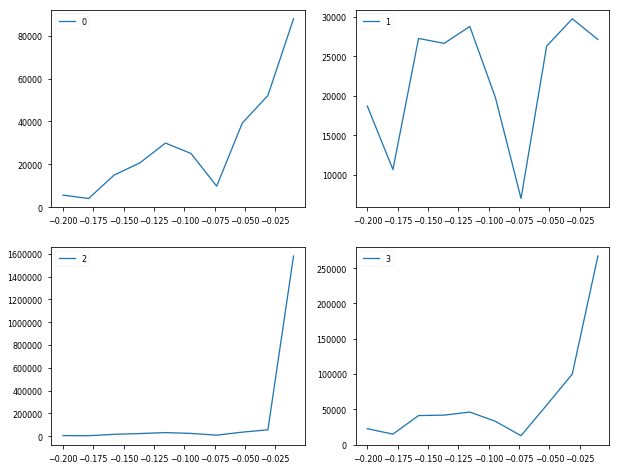

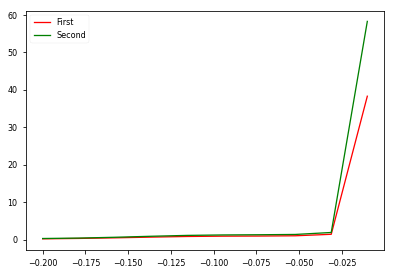

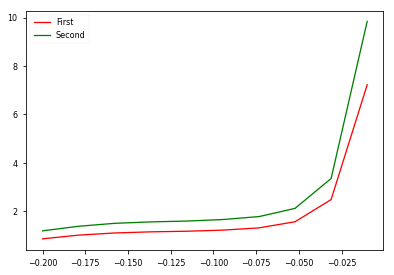

080819_15
First


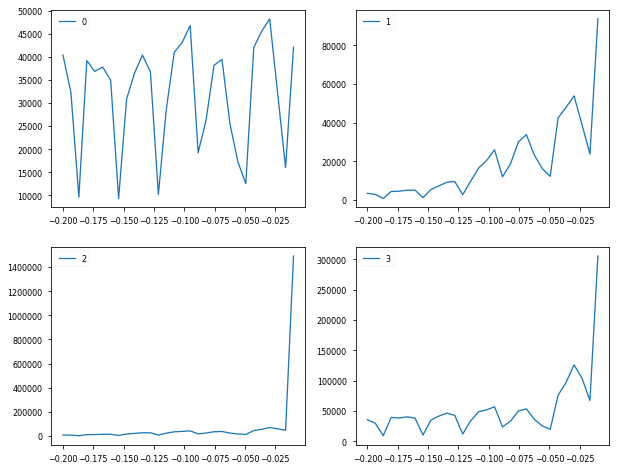

Second


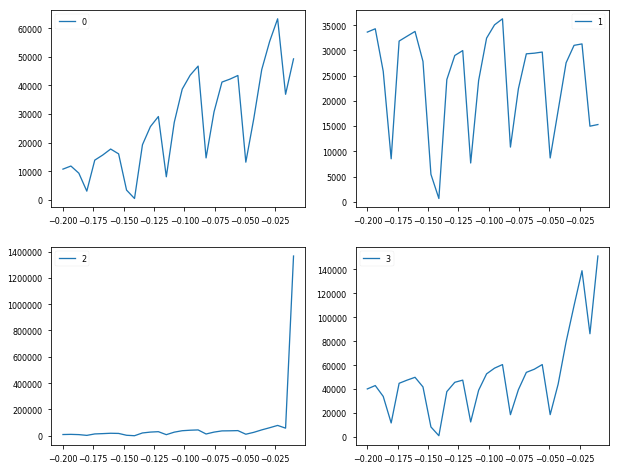

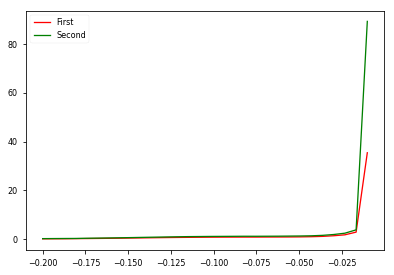

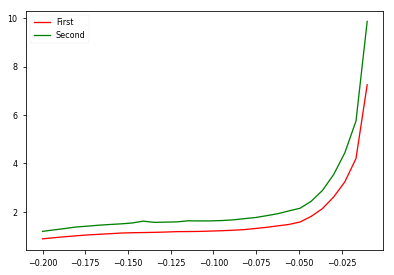

080819_8
First


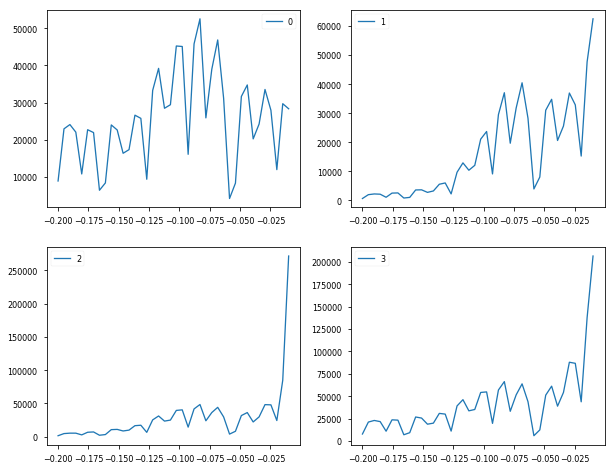

Second


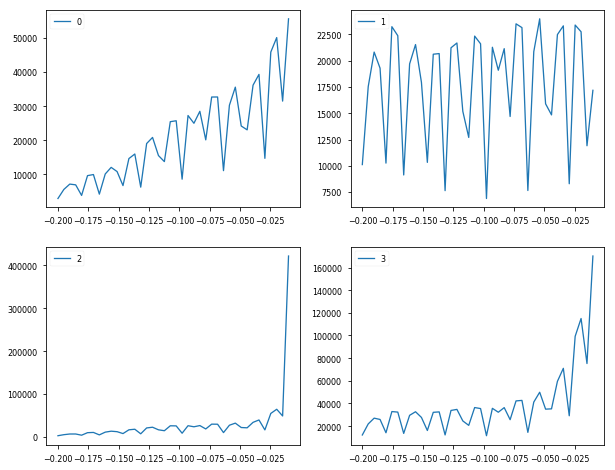

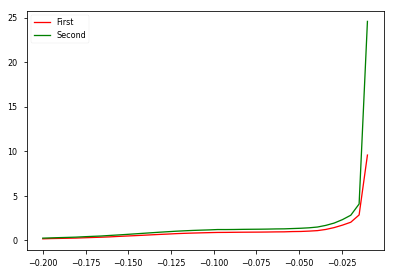

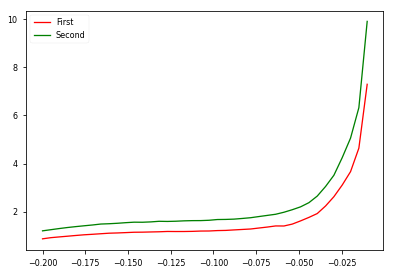

080819_12
First


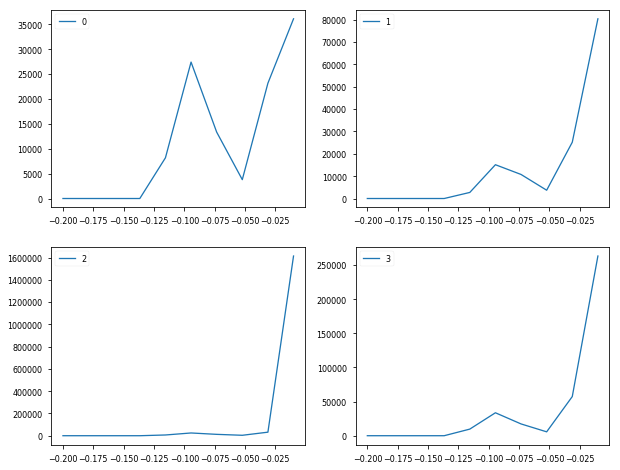

Second


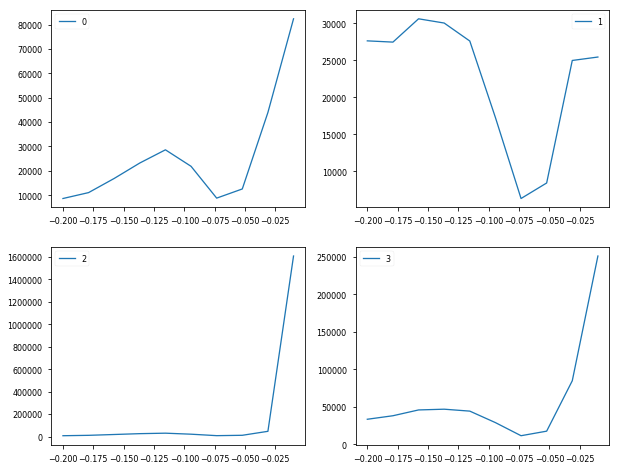

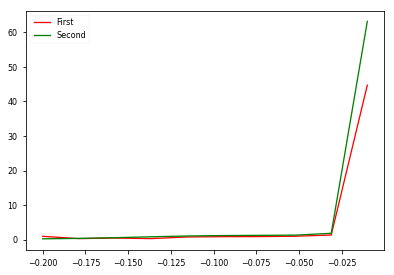

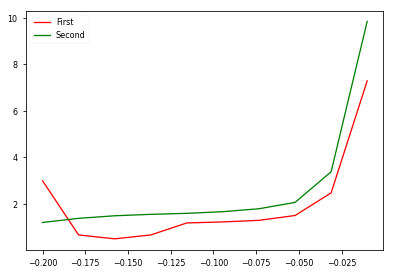

In [511]:
folder = 'data/'
filename = '080819_13'

threshold_10_10 = np.genfromtxt(os.path.join(folder, filename + '_first.txt'), usecols = 0, skip_header = 6, unpack = True)
rateFirst = np.genfromtxt(os.path.join(folder, filename + '_first.txt'), usecols = (1,2,3,4), skip_header = 6, unpack = True)
rateSecond = np.genfromtxt(os.path.join(folder, filename + '_second.txt'), usecols = (1,2,3,4), skip_header = 6, unpack = True)
print(filename)
print('First')
fig, axs = plt.subplots(2,2, figsize=(10,8))
for i in range(4):
    ax = axs[int(i>1)][int(i%2)]
    ax.plot(threshold_10_10, rateFirst[i], label = i)
    ax.legend(loc='best')

plt.show()
print('Second')    
fig, axs = plt.subplots(2,2, figsize=(10,8))
for i in range(4):
    ax = axs[int(i>1)][int(i%2)]
    ax.plot(threshold_10_10, rateSecond[i], label = i)
    #plt.show()

    ax.legend(loc='best')
plt.show()

rate_10_10 = np.zeros(np.shape(rateFirst))
for i in range(len(rateFirst)):
    if (i==0):
        rate_10_10[i] = rateSecond[i] / rateSecond[1] 
    elif (i==1):
        rate_10_10[i] = rateFirst[i] / rateFirst[0] 
    # average over both measurements if not channel one or two
    else:
        plt.plot(threshold_10_10, rateFirst[i] / rateFirst[0], c='red', label='First')
        plt.plot(threshold_10_10, rateSecond[i] / rateSecond[1], c='green', label='Second')
        plt.legend(loc='best')
        plt.show()

        rate_10_10[i] = rateFirst[i] / rateFirst[0]



#########################################

filename = '080819_15'

threshold_30_10 = np.genfromtxt(os.path.join(folder, filename + '_first.txt'), usecols = 0, skip_header = 6, unpack = True)
rateFirst = np.genfromtxt(os.path.join(folder, filename + '_first.txt'), usecols = (1,2,3,4), skip_header = 6, unpack = True)
rateSecond = np.genfromtxt(os.path.join(folder, filename + '_second.txt'), usecols = (1,2,3,4), skip_header = 6, unpack = True)
print(filename)
print('First')
fig, axs = plt.subplots(2,2, figsize=(10,8))
for i in range(4):
    ax = axs[int(i>1)][int(i%2)]
    ax.plot(threshold_30_10, rateFirst[i], label = i)
    ax.legend(loc='best')

plt.show()
print('Second')    
fig, axs = plt.subplots(2,2, figsize=(10,8))
for i in range(4):
    ax = axs[int(i>1)][int(i%2)]
    ax.plot(threshold_30_10, rateSecond[i], label = i)
    #plt.show()

    ax.legend(loc='best')
plt.show()

rate_30_10 = np.zeros(np.shape(rateFirst))
for i in range(len(rateFirst)):
    if (i==0):
        rate_30_10[i] = rateSecond[i] / rateSecond[1] 
    elif (i==1):
        rate_30_10[i] = rateFirst[i] / rateFirst[0] 
    # average over both measurements if not channel one or two
    else:
        plt.plot(threshold_30_10, rateFirst[i] / rateFirst[0], c='red', label='First')
        plt.plot(threshold_30_10, rateSecond[i] / rateSecond[1], c='green', label='Second')
        plt.legend(loc='best')
        plt.show()

        rate_30_10[i] = rateFirst[i] / rateFirst[0]
        
#########################################

filename = '080819_8'

threshold_40_15 = np.genfromtxt(os.path.join(folder, filename + '_first.txt'), usecols = 0, skip_header = 6, unpack = True)
rateFirst = np.genfromtxt(os.path.join(folder, filename + '_first.txt'), usecols = (1,2,3,4), skip_header = 6, unpack = True)
rateSecond = np.genfromtxt(os.path.join(folder, filename + '_second.txt'), usecols = (1,2,3,4), skip_header = 6, unpack = True)
print(filename)
print('First')
fig, axs = plt.subplots(2,2, figsize=(10,8))
for i in range(4):
    ax = axs[int(i>1)][int(i%2)]
    ax.plot(threshold_40_15, rateFirst[i], label = i)
    ax.legend(loc='best')

plt.show()
print('Second')    
fig, axs = plt.subplots(2,2, figsize=(10,8))
for i in range(4):
    ax = axs[int(i>1)][int(i%2)]
    ax.plot(threshold_40_15, rateSecond[i], label = i)
    #plt.show()

    ax.legend(loc='best')
plt.show()

rate_40_15 = np.zeros(np.shape(rateFirst))
for i in range(len(rateFirst)):
    if (i==0):
        rate_40_15[i] = rateSecond[i] / rateSecond[1] 
    elif (i==1):
        rate_40_15[i] = rateFirst[i] / rateFirst[0] 
    # average over both measurements if not channel one or two
    else:
        plt.plot(threshold_40_15, rateFirst[i] / rateFirst[0], c='red', label='First')
        plt.plot(threshold_40_15, rateSecond[i] / rateSecond[1], c='green', label='Second')
        plt.legend(loc='best')
        plt.show()

        rate_40_15[i] = rateFirst[i] / rateFirst[0]


#########################################

filename = '080819_12'

threshold_10_5 = np.genfromtxt(os.path.join(folder, filename + '_first.txt'), usecols = 0, skip_header = 6, unpack = True)
rateFirst = np.genfromtxt(os.path.join(folder, filename + '_first.txt'), usecols = (1,2,3,4), skip_header = 6, unpack = True)
rateSecond = np.genfromtxt(os.path.join(folder, filename + '_second.txt'), usecols = (1,2,3,4), skip_header = 6, unpack = True)
print(filename)
print('First')
fig, axs = plt.subplots(2,2, figsize=(10,8))
for i in range(4):
    ax = axs[int(i>1)][int(i%2)]
    ax.plot(threshold_10_5, rateFirst[i], label = i)
    ax.legend(loc='best')

plt.show()
print('Second')    
fig, axs = plt.subplots(2,2, figsize=(10,8))
for i in range(4):
    ax = axs[int(i>1)][int(i%2)]
    ax.plot(threshold_10_5, rateSecond[i], label = i)
    #plt.show()

    ax.legend(loc='best')
plt.show()

rate_10_5 = np.zeros(np.shape(rateFirst))
for i in range(len(rateFirst)):
    if (i==0):
        rate_10_5[i] = rateSecond[i] / rateSecond[1] 
    elif (i==1):
        rate_10_5[i] = rateFirst[i] / rateFirst[0] 
    # average over both measurements if not channel one or two
    else:
        plt.plot(threshold_10_5, rateFirst[i] / rateFirst[0], c='red', label='First')
        plt.plot(threshold_10_5, rateSecond[i] / rateSecond[1], c='green', label='Second')
        plt.legend(loc='best')
        plt.show()

        rate_10_5[i] = rateFirst[i] / rateFirst[0]

    

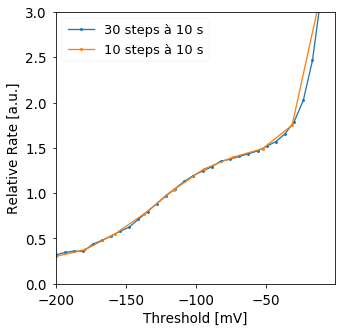

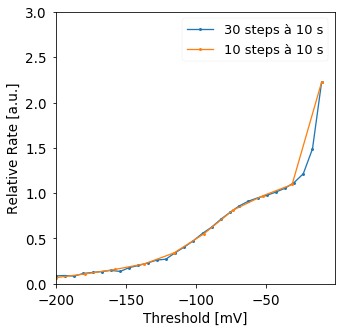

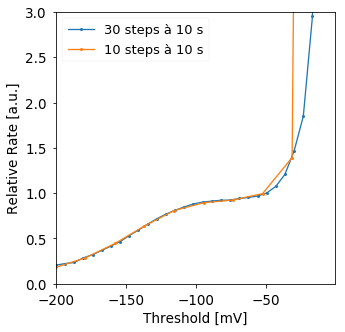

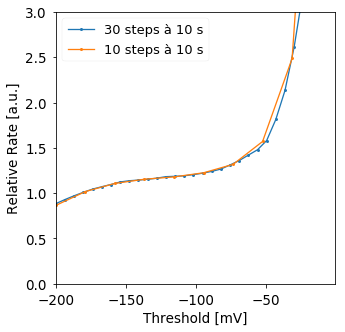

In [515]:
for i in range(4):
    plt.figure(figsize=(5,5))



    #plt.plot(threshold_40_15*1000, rate_40_15[i], 'o', markersize=3, ls='-', label='40 steps à 15 s')   
    plt.plot(threshold_30_10*1000, rate_30_10[i], 'o', markersize=3, ls='-', label='30 steps à 10 s')
    plt.plot(threshold_10_10*1000, rate_10_10[i], 'o', markersize=3, ls='-', label='10 steps à 10 s')    
    #plt.plot(threshold_10_5*1000, rate_10_5[i], 'o', markersize=3, ls='-',label='10 steps à 5 s')      
    plt.ylim(0,3)
    plt.xlabel('Threshold [mV]', fontsize=13.5)
    plt.ylabel('Relative Rate [a.u.]', fontsize=13.5)
    plt.legend(loc='best', fontsize=13)
    plt.xlim(-200)
    plt.tick_params(labelsize=13.5)
    plt.show()


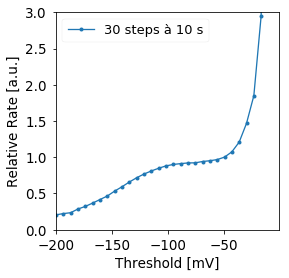

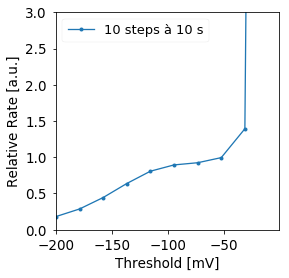

In [521]:
i=2
plt.figure(figsize=(4,4))
plt.plot(threshold_30_10*1000, rate_30_10[i], 'o', markersize=4, ls='-', label='30 steps à 10 s')
  
plt.ylim(0,3)
plt.xlabel('Threshold [mV]', fontsize=13.5)
plt.ylabel('Relative Rate [a.u.]', fontsize=13.5)
plt.legend(loc='best', fontsize=13)
plt.xlim(-200)
plt.tick_params(labelsize=13.5)
#plt.savefig('30_10.pdf', bbox_inches='tight')
plt.show()


plt.figure(figsize=(4,4))
plt.plot(threshold_10_10*1000, rate_10_10[i], 'o', markersize=4, ls='-', label='10 steps à 10 s')    
  
plt.ylim(0,3)
plt.xlabel('Threshold [mV]', fontsize=13.5)
plt.ylabel('Relative Rate [a.u.]', fontsize=13.5)
plt.legend(loc='best', fontsize=13)
plt.xlim(-200)
plt.tick_params(labelsize=13.5)
#plt.savefig('10_10.pdf', bbox_inches='tight')
plt.show()

## Test data

In [523]:
folder = 'data/'
filename = 'example'

threshold = np.genfromtxt(os.path.join(folder, filename + '.bin'), usecols = 0, skip_header = 6, unpack = True)
rate = np.genfromtxt(os.path.join(folder, filename + '.bin'), usecols = (1,2,3,4), skip_header = 6, unpack = True)

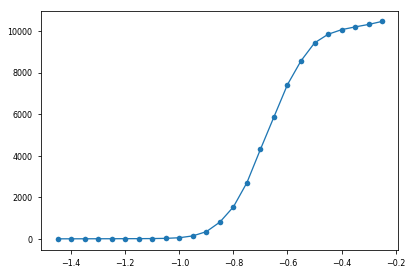

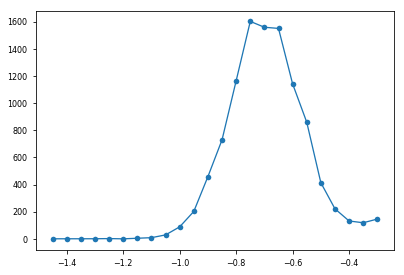

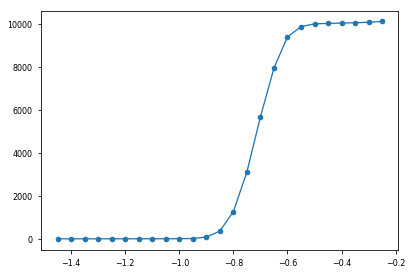

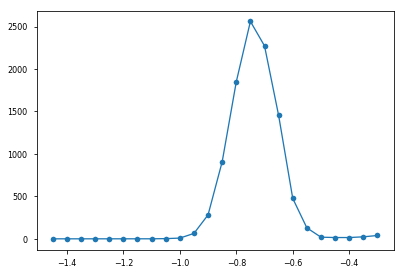

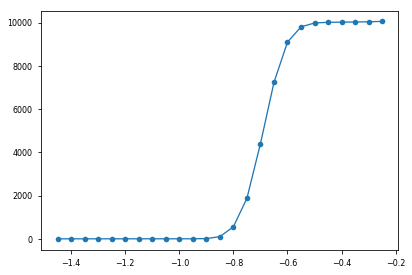

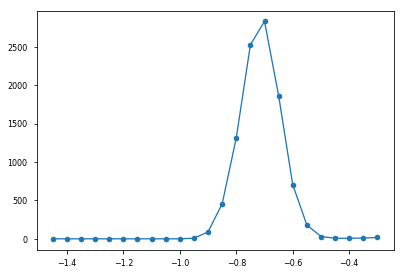

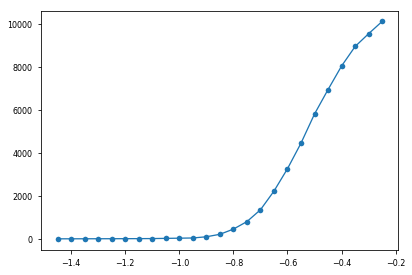

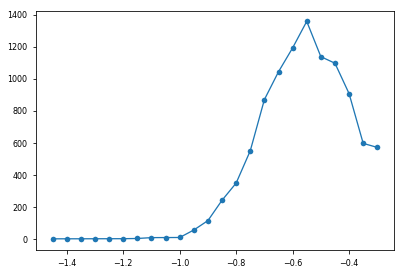

In [535]:
for k in range(4):
    plt.plot(threshold, rate[k], 'o', ls='-')
    plt.show()
    derivative=[]
    for i in range(len(threshold)-1):
        derivative.append(rate[k][::-1][i+1]-rate[k][::-1][i])

    derivative = np.array(derivative)

    plt.plot(threshold[::-1][:-1], derivative, 'o', ls='-')
    plt.show()

In [618]:
folder = 'data/'
filename = 'example_300'

threshold = np.genfromtxt(os.path.join(folder, filename + '.bin'), usecols = 0, skip_header = 6, unpack = True)
rate = np.genfromtxt(os.path.join(folder, filename + '.bin'), usecols = (1,2,3,4), skip_header = 6, unpack = True)

In [622]:
import pylab as p

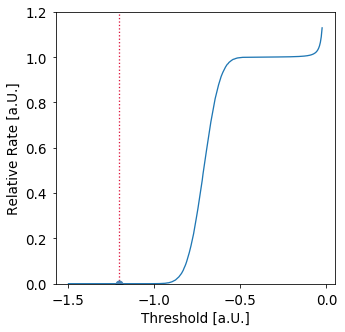

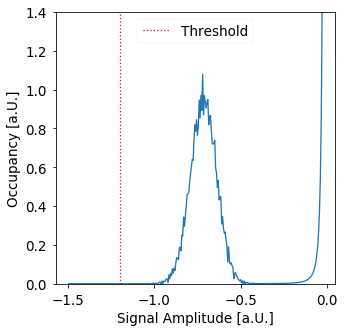

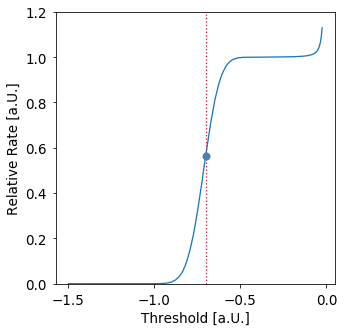

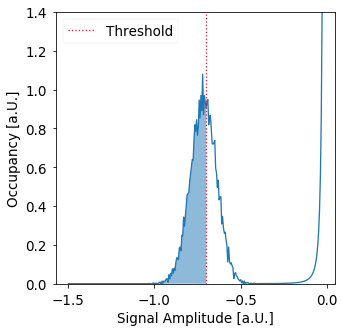

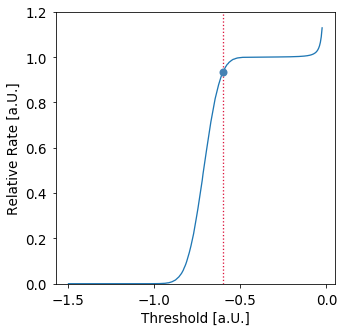

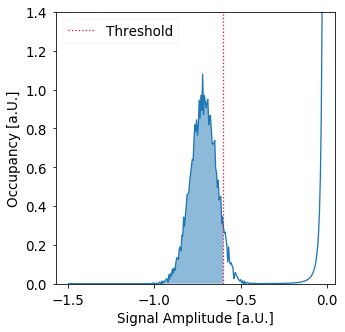

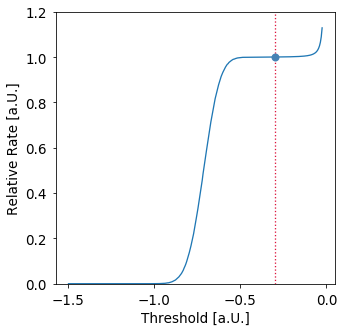

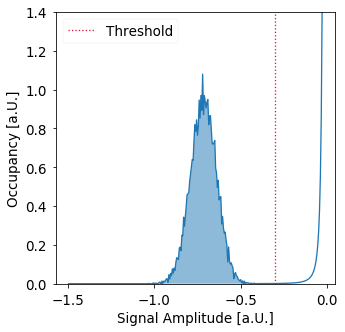

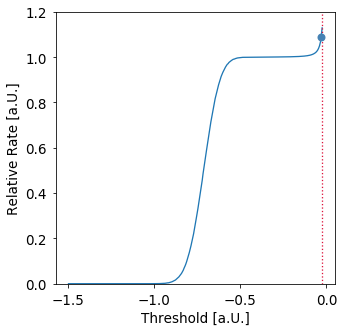

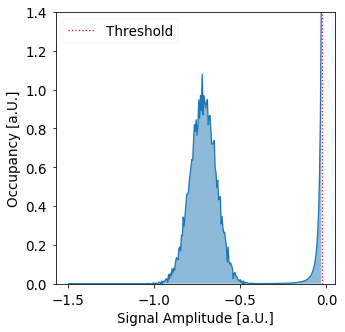

In [667]:
#for k in range(4):
k=1
j=1
for currentThreshold in [-1.2, -0.7, -0.6, -0.3, -0.025]:
    mask = threshold[::-1][:-1] <= currentThreshold

    plt.figure(figsize=(5,5))
    plt.plot(threshold, rate[k]/100000, ls='-')
    plt.plot([currentThreshold, currentThreshold], [0,1.2], c='crimson', ls=':')
    x=threshold[::-1][:-1][mask][-1]
    y=rate[k][::-1][:-1][mask][-1]
    plt.plot(x,y/100000 ,'o', c='steelblue', markersize=8)
    plt.xlabel('Threshold [a.U.]', fontsize=13.5)
    plt.ylabel('Relative Rate [a.U.]', fontsize=13.5)

    plt.ylim(0, 1.2)
    plt.tick_params(labelsize=13.5)
    #plt.savefig('diags/rate_fake_{}.pdf'.format(j), bbox_inches='tight')
    plt.show()
    derivative=[]
    for i in range(len(threshold)-1):
        derivative.append((rate[k][::-1][i+1]-rate[k][::-1][i])/100000)

    derivative = np.array(derivative)

    plt.figure(figsize=(5,5))
    plt.plot(threshold[::-1][:-1], derivative*100/2.8, ls='-')
    plt.plot([currentThreshold, currentThreshold], [0,1.4], c='crimson', ls=':', label='Threshold')
    plt.xlabel('Signal Amplitude [a.U.]', fontsize=13.5)
    plt.ylabel('Occupancy [a.U.]', fontsize=13.5)
    plt.ylim(0,1.4)

    plt.fill_between(threshold[::-1][:-1][mask],derivative[mask]*100/2.8,0, alpha=0.5)

    plt.tick_params(labelsize=13.5)
    plt.legend(loc='best', fontsize=13.5)
    #plt.savefig('diags/derivative_fake_{}.pdf'.format(j), bbox_inches='tight')
    plt.show()
    j+=1